#### RUBROS DE BALANCE


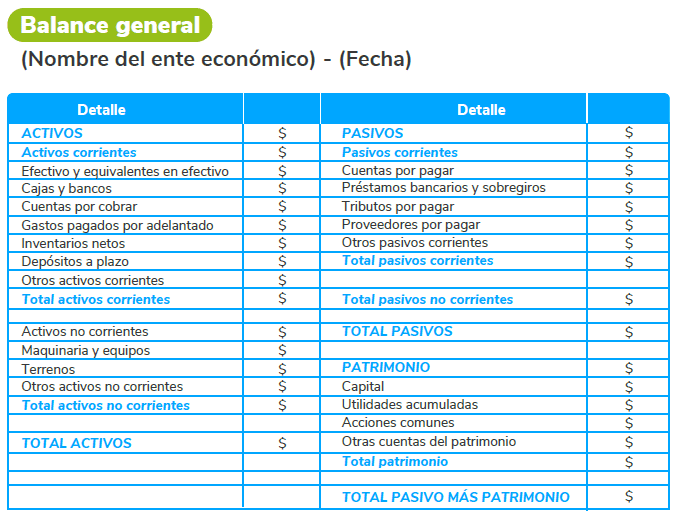

### CAJA

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import faker

# Crear un objeto Faker
faker = faker.Faker()

# Generar datos para el rubro de caja
# The numerify method does not accept 'from_int' and 'to_int' arguments.
# Instead, use randint from the random module for generating numbers within a specific range.
import random
efectivo_en_caja = random.randint(10000, 1000000)
bancos = random.randint(50000, 500000)
inversiones_a_corto_plazo = random.randint(20000, 200000)
equivalente_en_efectivo = random.randint(10000, 100000)

# Imprimir los datos generados
print("Efectivo en caja:", efectivo_en_caja)
print("Bancos:", bancos)
print("Inversiones a corto plazo:", inversiones_a_corto_plazo)
print("Equivalente en efectivo:", equivalente_en_efectivo)

Efectivo en caja: 343082
Bancos: 272864
Inversiones a corto plazo: 27242
Equivalente en efectivo: 13561


##creditos

In [ ]:
from faker import Faker
import random
from datetime import date, timedelta

# Inicializar Faker para un locale específico (opcional, pero útil para formatos)
fake = Faker('pt_BR')  # Para datos con formato brasileño

# --- Generación de datos para Créditos Cuentas por Cobrar ---
num_clientes = random.randint(1,50)
creditos_por_cobrar = []

for _ in range(num_clientes):
    nombre_cliente = fake.company()
    monto = round(random.uniform(100, 10000), 2)
    fecha_emision = fake.date_between(start_date='-1y', end_date='today')
    dias_plazo = random.choice([30, 60, 90, 120])
    fecha_vencimiento = fecha_emision + timedelta(days=dias_plazo)
    estado = random.choice(['Pendiente', 'Parcialmente Pagado', 'Pagado', 'Vencido'])
    saldo_pendiente = 0.0
    if estado == 'Pendiente' or estado == 'Parcialmente Pagado':
        saldo_pendiente = round(random.uniform(0.1, 1) * monto, 2) if estado == 'Parcialmente Pagado' else monto

    creditos_por_cobrar.append({
        'Cliente': nombre_cliente,
        'Monto Crédito': monto,
        'Fecha Emisión': fecha_emision,
        'Fecha Vencimiento': fecha_vencimiento,
        'Días Plazo': dias_plazo,
        'Estado': estado,
        'Saldo Pendiente': saldo_pendiente
    })



# --- Generación de datos para Gastos Pagados por Adelantado ---
num_gastos = random.randint(1,50)
gastos_adelantados = []

tipos_gasto = ['Alquiler', 'Seguro', 'Publicidad', 'Suministros', 'Mantenimiento']

for _ in range(num_gastos):
    tipo = random.choice(tipos_gasto)
    monto_total = round(random.uniform(500, 5000), 2)
    fecha_pago = fake.date_between(start_date='-6m', end_date='today')
    periodo_cobertura_meses = random.choice([3, 6, 12])
    fecha_inicio_cobertura = fecha_pago + timedelta(days=random.randint(0, 30))
    fecha_fin_cobertura = fecha_inicio_cobertura + timedelta(days=periodo_cobertura_meses * 30) # Aproximación
    gasto_amortizado = round(monto_total * random.uniform(0, 1), 2)
    saldo_pendiente_amortizar = round(monto_total - gasto_amortizado, 2)

    gastos_adelantados.append({
        'Tipo Gasto': tipo,
        'Monto Total Pagado': monto_total,
        'Fecha de Pago': fecha_pago,
        'Periodo Cobertura (Meses)': periodo_cobertura_meses,
        'Fecha Inicio Cobertura': fecha_inicio_cobertura,
        'Fecha Fin Cobertura': fecha_fin_cobertura,
        'Gasto Amortizado': gasto_amortizado,
        'Saldo Pendiente Amortizar': saldo_pendiente_amortizar
    })


creditos_por_cobrar = pd.DataFrame(creditos_por_cobrar)
gastos_adelantados = pd.DataFrame(gastos_adelantados)

df_creditos =creditos_por_cobrar.to_csv('creditos_por_cobrar.csv', index=False)
df_gastos_adelantados =gastos_adelantados.to_csv('gastos_adelantados.csv', index=False)

### grabar el archivo csv e imprimir


# Read CSV files back into DataFrames (to "print" the CSV content)
with open('creditos_por_cobrar.csv', 'r') as f:
    csv_content_creditos = f.read()
print("Créditos por Cobrar CSV Content:\n", csv_content_creditos)

with open('gastos_adelantados.csv', 'r') as f:
    csv_content_gastos = f.read()
print("\nGastos Adelantados CSV Content:\n", csv_content_gastos)

# Alternatively, you can print the DataFrames directly:
print("\nCréditos por Cobrar DataFrame:\n", df_creditos)
print("\nGastos Adelantados DataFrame:\n", df_gastos_adelantados)



Créditos por Cobrar CSV Content:
 Cliente,Monto Crédito,Fecha Emisión,Fecha Vencimiento,Días Plazo,Estado,Saldo Pendiente
Pereira,2848.44,2024-09-09,2024-12-08,90,Pendiente,2848.44
Barbosa Gonçalves S.A.,8716.59,2025-02-02,2025-04-03,60,Parcialmente Pagado,3983.7
Gomes Sampaio Ltda.,9497.76,2025-05-01,2025-05-31,30,Vencido,0.0
Vasconcelos,7423.05,2024-12-03,2025-02-01,60,Parcialmente Pagado,4290.0
Câmara da Costa e Filhos,7775.63,2025-01-02,2025-03-03,60,Parcialmente Pagado,3117.42
Sousa e Filhos,9000.06,2024-10-16,2025-02-13,120,Pagado,0.0
Farias Freitas S/A,8160.53,2024-06-01,2024-09-29,120,Parcialmente Pagado,1433.03
Porto Oliveira S/A,7020.61,2024-07-30,2024-11-27,120,Pagado,0.0
Borges,6708.44,2024-10-16,2025-02-13,120,Pendiente,6708.44
Câmara Fonseca S/A,8361.76,2024-07-03,2024-09-01,60,Pagado,0.0
Abreu e Filhos,3976.88,2025-02-13,2025-04-14,60,Pagado,0.0
Vargas Oliveira - EI,8690.75,2025-02-03,2025-04-04,60,Pendiente,8690.75
Moraes,1703.62,2025-01-02,2025-05-02,120,Pagado,0.0
Fre

In [ ]:
# prompt: generar la impresion de los dataset  creditos_por_cobrar = pd.DataFrame(creditos_por_cobrar)
# gastos_adelantados = pd.DataFrame(gastos_adelantados)
# df_creditos =creditos_por_cobrar.to_csv('creditos_por_cobrar.csv', index=False)
# df_gastos_adelantados =gastos_adelantados.to_csv('gastos_adelantados.csv', index=False)

import pandas as pd

# Assuming creditos_por_cobrar and gastos_adelantados DataFrames are already defined

# Display the DataFrames
print("\nCréditos por Cobrar DataFrame:\n", creditos_por_cobrar)
print("\nGastos Adelantados DataFrame:\n", gastos_adelantados)


In [ ]:
creditos_por_cobrar.info()

In [ ]:
gastos_adelantados.info()

###BIENES DE USO

In [ ]:
from faker import Faker
import random
from datetime import date, timedelta

# Inicializar Faker para un locale específico (opcional)
fake = Faker('pt_BR')

# --- Generación de datos para Bienes de Uso ---
num_activos = random.randint(10, 30)
bienes_de_uso = []

tipos_activo = ['Edificio', 'Maquinaria Industrial', 'Vehículo', 'Mobiliario y Equipo de Oficina', 'Equipo de Cómputo', 'Instalaciones']

for _ in range(num_activos):
    tipo = random.choice(tipos_activo)
    descripcion = fake.sentence(nb_words=5)
    fecha_adquisicion = fake.date_between(start_date='-10y', end_date='-1y')
    costo_adquisicion = round(random.uniform(5000, 500000), 2)

    # Datos de Depreciación
    vida_util_anios = random.choice([5, 10, 20, 30, 50])
    valor_residual = round(costo_adquisicion * random.uniform(0.05, 0.20), 2)  # 5% a 20% del costo
    fecha_inicio_depreciacion = fecha_adquisicion + timedelta(days=random.randint(0, 30))
    # Cálculo de la depreciación acumulada (simulado)
    #The 'fecha_inicio_depreciacion` and `date.today()` are already 'datetime.date' objects.
    #Remove the extra .date() calls, and calculate the difference in days to fix the error.
    anios_depreciados = (date.today() - fecha_inicio_depreciacion).days // 365 if date.today() > fecha_inicio_depreciacion else 0
    anios_depreciados = min(anios_depreciados, vida_util_anios) # No depreciar más allá de la vida útil
    depreciacion_anual = (costo_adquisicion - valor_residual) / vida_util_anios
    depreciacion_acumulada = round(depreciacion_anual * anios_depreciados, 2)
    valor_neto_libro = round(costo_adquisicion - depreciacion_acumulada, 2)

    # Datos Adicionales (opcional)
    numero_serie = fake.unique.random_number(digits=10) if random.random() < 0.7 else None
    ubicacion = fake.city() if random.random() < 0.5 else None
    proveedor = fake.company() if random.random() < 0.6 else None

    bienes_de_uso.append({
        'Tipo de Activo': tipo,
        'Descripción': descripcion,
        'Fecha de Adquisición': fecha_adquisicion,
        'Costo de Adquisición': costo_adquisicion,
        'Vida Útil (Años)': vida_util_anios,
        'Valor Residual': valor_residual,
        'Fecha Inicio Depreciación': fecha_inicio_depreciacion,
        'Depreciación Anual (Estimada)': round(depreciacion_anual, 2),
        'Depreciación Acumulada': depreciacion_acumulada,
        'Valor Neto en Libros': valor_neto_libro,
        'Número de Serie': numero_serie,
        'Ubicación': ubicacion,
        'Proveedor': proveedor
    })

print("--- Bienes de Uso ---")
for bien in bienes_de_uso:
    print(bien)

#### ACTIVOS NO CORRIENTES

In [ ]:
from faker import Faker
import random
from datetime import date, timedelta

# Inicializar Faker
fake = Faker('pt_BR')

# --- 1. Bienes de Uso (Resumido) ---
num_bienes_uso = random.randint(5, 10)
bienes_de_uso_nc = []
tipos_activo_bu = ['Edificio', 'Maquinaria', 'Vehículo', 'Mobiliario']
for _ in range(num_bienes_uso):
    tipo = random.choice(tipos_activo_bu)
    descripcion = f"{tipo} - {fake.word().capitalize()}"
    valor_adquisicion = round(random.uniform(10000, 500000), 2)
    depreciacion_acumulada = round(valor_adquisicion * random.uniform(0.1, 0.6), 2)
    valor_neto = round(valor_adquisicion - depreciacion_acumulada, 2)
    bienes_de_uso_nc.append({
        'Tipo': tipo,
        'Descripción': descripcion,
        'Valor Adquisición': valor_adquisicion,
        'Depreciación Acumulada': depreciacion_acumulada,
        'Valor Neto': valor_neto
    })

print("--- Activos No Corrientes ---")
print("\n--- Bienes de Uso ---")
for bien in bienes_de_uso_nc:
    print(bien)

# --- 2. Activos Intangibles ---
num_intangibles = random.randint(3, 7)
activos_intangibles = []
tipos_intangible = ['Patente', 'Marca Registrada', 'Derechos de Autor', 'Fondo de Comercio', 'Software']
for _ in range(num_intangibles):
    tipo = random.choice(tipos_intangible)
    descripcion = f"{tipo} - {fake.word().capitalize()}"
    valor_adquisicion = round(random.uniform(5000, 200000), 2)
    amortizacion_acumulada = round(valor_adquisicion * random.uniform(0.05, 0.4), 2)
    valor_neto = round(valor_adquisicion - amortizacion_acumulada, 2)
    vida_util_anios = random.choice([5, 10, 20]) if tipo != 'Fondo de Comercio' else None # Fondo de comercio no se amortiza generalmente
    activos_intangibles.append({
        'Tipo': tipo,
        'Descripción': descripcion,
        'Valor Adquisición': valor_adquisicion,
        'Amortización Acumulada': amortizacion_acumulada,
        'Valor Neto': valor_neto,
        'Vida Útil (Años)': vida_util_anios
    })

print("\n--- Activos Intangibles ---")
for intangible in activos_intangibles:
    print(intangible)

# --- 3. Inversiones a Largo Plazo ---
num_inversiones_lp = random.randint(2, 5)
inversiones_lp =

## deteccion de anomalias de ofertas

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_ofertas(registros_ofertas, umbral_anomalia):
    """
    Detecta anomalías en ofertas utilizando Isolation Forest.

    Args:
        registros_ofertas (pd.DataFrame): DataFrame con registros de ofertas.
        umbral_anomalia (float): Umbral para considerar una oferta como anomalía.

    Returns:
        pd.DataFrame: DataFrame con ofertas sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'plazo', 'calificacion_postor']
    datos_analisis = registros_ofertas[columnas_analisis]

    # 2. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 3. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 4. Agrega las predicciones al DataFrame original
    registros_ofertas['anomalia'] = anomalias

    # 5. Filtra las ofertas sospechosas
    ofertas_sospechosas = registros_ofertas[registros_ofertas['anomalia'] == -1]

    return ofertas_sospechosas

# Ejemplo de uso
registros_ofertas = pd.DataFrame({
    'monto': [1000, 2000, 1500, 10000, 1200, 1800],
    'plazo': [12, 24, 18, 6, 12, 24],
    'calificacion_postor': [8, 9, 7, 3, 8, 9]
})

umbral_anomalia = 0.1

ofertas_sospechosas = detectar_anomalias_ofertas(registros_ofertas, umbral_anomalia)

print(ofertas_sospechosas)

2. Detección de colusión entre postores:

In [ ]:


import pandas as pd
import networkx as nx

def detectar_colusion_postores(registros_ofertas, umbral_similitud):
    """
    Detecta colusión entre postores analizando la similitud de sus ofertas.

    Args:
        registros_ofertas (pd.DataFrame): DataFrame con registros de ofertas.
        umbral_similitud (float): Umbral para considerar dos ofertas como similares.

    Returns:
        list: Lista de pares de postores sospechosos de colusión.
    """

    # 1. Crea un grafo de postores
    grafo = nx.Graph()

    # 2. Compara las ofertas de todos los pares de postores
    postores = registros_ofertas['postor'].unique()
    for i in range(len(postores)):
        for j in range(i + 1, len(postores)):
            postor1 = postores[i]
            postor2 = postores[j]
            ofertas_postor1 = registros_ofertas[registros_ofertas['postor'] == postor1]['monto'].tolist()
            ofertas_postor2 = registros_ofertas[registros_ofertas['postor'] == postor2]['monto'].tolist()
            similitud = calcular_similitud(ofertas_postor1, ofertas_postor2)
            if similitud > umbral_similitud:
                grafo.add_edge(postor1, postor2)

    # 3. Encuentra los componentes conectados del grafo
    componentes_conectados = list(nx.connected_components(grafo))

    # 4. Filtra los componentes con más de un postor
    postores_sospechosos = [componente for componente in componentes_conectados if len(componente) > 1]

    return postores_sospechosos

def calcular_similitud(ofertas1, ofertas2):
    """
    Calcula la similitud entre dos listas de ofertas.

    Args:
        ofertas1 (list): Lista de ofertas del primer postor.
        ofertas2 (list): Lista de ofertas del segundo postor.

    Returns:
        float: Similitud entre las ofertas.
    """

    # Implementa tu propia lógica para calcular la similitud
    # Por ejemplo, puedes utilizar la distancia euclidiana o la correlación de Pearson
    # En este ejemplo, se utiliza una implementación simplificada
    if len(ofertas1) != len(ofertas2):
        return 0
    similitud = 0
    for i in range(len(ofertas1)):
        similitud += abs(ofertas1[i] - ofertas2[i])
    similitud = 1 / (1 + similitud)
    return similitud

# Ejemplo de uso
registros_ofertas = pd.DataFrame({
    'postor': ['A', 'B', 'C', 'D', 'E', 'F'],
    'monto': [1000, 2000, 1500, 1000, 2000, 1500]
})

umbral_similitud = 0.8

postores_sospechosos = detectar_colusion_postores(registros_ofertas, umbral_similitud)

print(postores_sospechosos)

# **3. Comparación de precios con lista externa:**

(El código para comparar precios con una lista externa es el mismo que se proporcionó en la respuesta anterior.)

Consideraciones importantes:

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

In [ ]:

import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_caja(registros_caja, umbral_anomalia):
    """
    Detecta anomalías en transacciones de caja utilizando Isolation Forest.

    Args:
        registros_caja (pd.DataFrame): DataFrame con registros de transacciones de caja.
        umbral_anomalia (float): Umbral para considerar una transacción como anomalía.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'hora', 'tipo_transaccion']
    datos_analisis = registros_caja[columnas_analisis]

    # 2. Convierte la columna 'hora' a valores numéricos
    datos_analisis['hora'] = pd.to_datetime(datos_analisis['hora']).dt.hour

    # 3. Codifica la columna 'tipo_transaccion' a valores numéricos
    datos_analisis['tipo_transaccion'] = pd.Categorical(datos_analisis['tipo_transaccion']).codes

    # 4. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 5. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 6. Agrega las predicciones al DataFrame original
    registros_caja['anomalia'] = anomalias

    # 7. Filtra las transacciones sospechosas
    transacciones_sospechosas = registros_caja[registros_caja['anomalia'] == -1]

    return transacciones_sospechosas

# Ejemplo de uso
registros_caja = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'hora': ['09:00', '10:00', '11:00', '18:00', '12:00', '13:00'],
    'tipo_transaccion': ['deposito', 'retiro', 'deposito', 'retiro', 'deposito', 'retiro']
})

umbral_anomalia = 0.1

transacciones_sospechosas = detectar_anomalias_caja(registros_caja, umbral_anomalia)

print(transacciones_sospechosas)

## Deteccion de patrones sospechosos

In [ ]:
import pandas as pd

def detectar_patrones_sospechosos(registros_caja):
    """
    Detecta patrones sospechosos en transacciones de caja.

    Args:
        registros_caja (pd.DataFrame): DataFrame con registros de transacciones de caja.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Busca transacciones con montos inusualmente altos o bajos
    transacciones_montos_inusuales = registros_caja[(registros_caja['monto'] > 1000) | (registros_caja['monto'] < 10)]

    # 2. Busca transacciones fuera de horario
    transacciones_fuera_horario = registros_caja[pd.to_datetime(registros_caja['hora']).dt.hour.isin([0, 1, 2, 3, 4, 5, 6, 22, 23])]

    # 3. Busca transacciones frecuentes con ciertos proveedores o clientes
    proveedores_clientes_frecuentes = registros_caja['proveedor_cliente'].value_counts()
    proveedores_clientes_sospechosos = proveedores_clientes_frecuentes[proveedores_clientes_frecuentes > 10].index
    transacciones_proveedores_clientes_sospechosos = registros_caja[registros_caja['proveedor_cliente'].isin(proveedores_clientes_sospechosos)]

    # 4. Combina los resultados
    transacciones_sospechosas = pd.concat([transacciones_montos_inusuales, transacciones_fuera_horario, transacciones_proveedores_clientes_sospechosos]).drop_duplicates()

    return transacciones_sospechosas

# Ejemplo de uso
registros_caja = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180, 5000, 5],
    'hora': ['09:00', '10:00', '11:00', '18:00', '12:00', '13:00', '02:00', '23:00'],
    'proveedor_cliente': ['A', 'B', 'A', 'C', 'A', 'B', 'D', 'E']
})

transacciones_sospechosas = detectar_patrones_sospechosos(registros_caja)

print(transacciones_sospechosas)

# **Consideraciones importantes:**

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detectar_anomalias_compras_internacionales(registros_compras, umbral_anomalia):
    """
    Detecta anomalías en compras internacionales utilizando Isolation Forest.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras internacionales.
        umbral_anomalia (float): Umbral para considerar una compra como anomalía.

    Returns:
        pd.DataFrame: DataFrame con compras sospechosas de fraude.
    """

    # 1. Selecciona las columnas relevantes para el análisis
    columnas_analisis = ['monto', 'cantidad', 'precio_unitario', 'pais_proveedor']
    datos_analisis = registros_compras[columnas_analisis]

    # 2. Codifica la columna 'pais_proveedor' a valores numéricos
    datos_analisis['pais_proveedor'] = pd.Categorical(datos_analisis['pais_proveedor']).codes

    # 3. Entrena el modelo Isolation Forest
    modelo = IsolationForest(contamination=umbral_anomalia)
    modelo.fit(datos_analisis)

    # 4. Predice las anomalías
    anomalias = modelo.predict(datos_analisis)

    # 5. Agrega las predicciones al DataFrame original
    registros_compras['anomalia'] = anomalias

    # 6. Filtra las compras sospechosas
    compras_sospechosas = registros_compras[registros_compras['anomalia'] == -1]

    return compras_sospechosas

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'cantidad': [10, 20, 15, 5, 12, 18],
    'precio_unitario': [10, 10, 10, 200, 10, 10],
    'pais_proveedor': ['China', 'EEUU', 'China', 'Alemania', 'China', 'EEUU']
})

umbral_anomalia = 0.1

compras_sospechosas = detectar_anomalias_compras_internacionales(registros_compras, umbral_anomalia)

print(compras_sospechosas)

2. Comparación de precios con lista externa internacional:

In [ ]:
import pandas as pd

def comparar_precios_externos_internacional(registros_precios_internos, registros_precios_externos):
    """
    Compara precios de compra internacionales con una lista de precios externa y resalta las diferencias.

    Args:
        registros_precios_internos (pd.DataFrame): DataFrame con registros de precios de compra internos.
        registros_precios_externos (pd.DataFrame): DataFrame con registros de precios de compra externos.

    Returns:
        pd.DataFrame: DataFrame con las diferencias de precios.
    """

    # 1. Combina los DataFrames por producto y pais
    precios_combinados = pd.merge(registros_precios_internos, registros_precios_externos, on=['producto', 'pais'], suffixes=('_interno', '_externo'))

    # 2. Calcula la diferencia de precios
    precios_combinados['diferencia_precio'] = precios_combinados['precio_interno'] - precios_combinados['precio_externo']

    # 3. Filtra las diferencias de precios
    diferencias_precios = precios_combinados[precios_combinados['diferencia_precio'] != 0]

    return diferencias_precios

# Ejemplo de uso
registros_precios_internos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'pais': ['China', 'EEUU', 'Alemania'],
    'precio_interno': [100, 150, 200]
})

registros_precios_externos = pd.DataFrame({
    'producto': ['Producto A', 'Producto B', 'Producto C'],
    'pais': ['China', 'EEUU', 'Alemania'],
    'precio_externo': [90, 160, 200]
})

diferencias_precios = comparar_precios_externos_internacional(registros_precios_internos, registros_precios_externos)

print(diferencias_precios)

3. Detección de transacciones con proveedores en paraísos fiscales:

In [ ]:
import pandas as pd

def detectar_transacciones_paraisos_fiscales(registros_compras, lista_paraisos_fiscales):
    """
    Detecta transacciones con proveedores en paraísos fiscales.

    Args:
        registros_compras (pd.DataFrame): DataFrame con registros de compras internacionales.
        lista_paraisos_fiscales (list): Lista de países considerados paraísos fiscales.

    Returns:
        pd.DataFrame: DataFrame con transacciones sospechosas de fraude.
    """

    # 1. Filtra las transacciones con proveedores en paraísos fiscales
    transacciones_paraisos = registros_compras[registros_compras['pais_proveedor'].isin(lista_paraisos_fiscales)]

    return transacciones_paraisos

# Ejemplo de uso
registros_compras = pd.DataFrame({
    'monto': [100, 200, 150, 1000, 120, 180],
    'pais_proveedor': ['China', 'Panamá', 'China', 'Islas Caimán', 'China', 'EEUU']
})

lista_paraisos_fiscales = ['Panamá', 'Islas Caimán', 'Suiza']

transacciones_paraisos = detectar_transacciones_paraisos_fiscales(registros_compras, lista_paraisos_fiscales)

print(transacciones_paraisos)

Consideraciones importantes:

Estos son solo ejemplos básicos. Puedes adaptarlos y mejorarlos según tus necesidades y los datos disponibles.
Es fundamental contar con datos de calidad y actualizados para obtener resultados precisos.
La implementación de estos algoritmos debe ir acompañada de controles internos y una cultura de ética en la empresa.
Si tienes grandes volúmenes de datos, considera utilizar herramientas de procesamiento de datos más potentes como Spark o Dask.

Activo: Representa los bienes y derechos que posee la empresa. Se clasifica en:
Activo corriente: Bienes y derechos que se espera convertir en efectivo en un plazo inferior a un año (efectivo, cuentas por cobrar, inventarios, etc.). **texto en negrita**
**Activo no corriente: Bienes y derechos que se espera convertir en efectivo en un plazo superior a un año (propiedades, planta y equipo, inversiones a largo plazo, etc.).**
Pasivo: Representa las obligaciones o deudas que tiene la empresa con terceros. Se clasifica en:
Pasivo corriente: Obligaciones que vencen en un plazo inferior a un año (cuentas por pagar, préstamos a corto plazo, etc.).
Pasivo no corriente: Obligaciones que vencen en un plazo superior a un año (préstamos a largo plazo, bonos emitidos, etc.).
Patrimonio neto: Representa la diferencia entre el activo y el pasivo. Es la parte del activo que pertenece a los propietarios de la empresa. Incluye el capital social, las reservas y las utilidades retenidas.
En resumen:

El activo muestra lo que la empresa posee.
El pasivo muestra lo que la empresa debe.
El patrimonio neto muestra lo que pertenece a los dueños.

##caja

In [ ]:
import sqlite3
import datetime

def registrar_gasto(fecha, descripcion, monto, comprobante, responsable):
    conn = sqlite3.connect('caja_chica.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS gastos (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            fecha DATE,
            descripcion TEXT,
            monto REAL,
            comprobante TEXT,
            responsable TEXT
        )
    ''')

    cursor.execute('''
        INSERT INTO gastos (fecha, descripcion, monto, comprobante, responsable)
        VALUES (?, ?, ?, ?, ?)
    ''', (fecha, descripcion, monto, comprobante, responsable))
    conn.commit()
    conn.close()

# Ejemplo de uso:
fecha_actual = datetime.date.today()
registrar_gasto(fecha_actual, 'Compra de suministros', 50.00, 'factura123.pdf', 'Juan Pérez')

In [ ]:
# This code appears to be SQL, not Python.
# Please ensure you are running this in a SQL environment.

# CREATE TABLE gastos (
#         id INTEGER PRIMARY KEY AUTOINCREMENT,
#         fecha DATE,
#         descripcion TEXT,
#         monto REAL,
#         comprobante TEXT,
#         responsable TEXT
#     );
        descripcion TEXT,
        monto REAL,
        comprobante TEXT,
        responsable TEXT
    )

2. Arqueos y conciliaciones (Python):

Puedes crear funciones en Python para realizar arqueos de caja y comparar el saldo en efectivo con el saldo registrado en la base de datos.

In [ ]:
def realizar_arqueo(saldo_efectivo):
        conn = sqlite3.connect('caja_chica.db')
        cursor = conn.cursor()
        cursor.execute('SELECT SUM(monto) FROM gastos')
        saldo_gastos = cursor.fetchone()[0] or 0 #maneja el caso de que no haya gastos
        conn.close()

        diferencia = saldo_efectivo - saldo_gastos
        if diferencia == 0:
            print('Arqueo correcto.')
        else:
            print(f'Diferencia: {diferencia}')
        return diferencia

    # Ejemplo de uso:
saldo_efectivo_actual = 100.00 # ejemplo de saldo fisico.
realizar_arqueo(saldo_efectivo_actual)

## creditos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
    'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
    'monto_credito': [10000, 12000, 15000, 18000, 50000, 20000, 22000]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de solicitudes de crédito, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de documentos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'dias_retraso_promedio': [1, 2, 3, 4, 30, 5, 6],
    'monto_pago_promedio': [100, 120, 150, 180, 500, 200, 220],
    'numero_disputas': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)



Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de clientes y cobranzas, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de pagos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

###bienes de cambio

1. Cálculo del punto de reorden (ROP):

In [ ]:
def calcular_rop(demanda_promedio_diaria, plazo_entrega, stock_seguridad):
  """
  Calcula el punto de reorden (ROP).

  Args:
    demanda_promedio_diaria: La demanda promedio diaria del producto.
    plazo_entrega: El plazo de entrega del proveedor en días.
    stock_seguridad: El stock de seguridad que se desea mantener.

  Returns:
    El punto de reorden (ROP).
  """
  rop = (demanda_promedio_diaria * plazo_entrega) + stock_seguridad
  return rop

# Ejemplo de uso:
demanda_diaria = 10
plazo_entrega_proveedor = 7
stock_seguridad_deseado = 20

punto_reorden = calcular_rop(demanda_diaria, plazo_entrega_proveedor, stock_seguridad_deseado)
print(f"El punto de reorden (ROP) es: {punto_reorden}")

2. Cálculo de la cantidad económica de pedido (EOQ):

In [ ]:
import math

def calcular_eoq(demanda_anual, costo_pedido, costo_mantenimiento):
  """
  Calcula la cantidad económica de pedido (EOQ).

  Args:
    demanda_anual: La demanda anual del producto.
    costo_pedido: El costo de realizar un pedido.
    costo_mantenimiento: El costo de mantener una unidad en inventario durante un año.

  Returns:
    La cantidad económica de pedido (EOQ).
  """
  eoq = math.sqrt((2 * demanda_anual * costo_pedido) / costo_mantenimiento)
  return eoq

# Ejemplo de uso:
demanda_anual_producto = 1000
costo_realizar_pedido = 50
costo_mantener_unidad = 10

cantidad_optima_pedido = calcular_eoq(demanda_anual_producto, costo_realizar_pedido, costo_mantener_unidad)
print(f"La cantidad económica de pedido (EOQ) es: {cantidad_optima_pedido}")

3. Clasificación de inventario (ABC):

In [ ]:
def clasificar_inventario_abc(productos):
  """
  Clasifica el inventario en categorías A, B y C.

  Args:
    productos: Una lista de diccionarios, donde cada diccionario representa un producto
               y contiene las claves 'nombre', 'valor_anual' y 'porcentaje'.

  Returns:
    Un diccionario con las categorías A, B y C, donde cada categoría es una lista de productos.
  """
  productos_ordenados = sorted(productos, key=lambda p: p['valor_anual'], reverse=True)
  total_valor_anual = sum(p['valor_anual'] for p in productos)

  categoria_a = []
  categoria_b = []
  categoria_c = []

  acumulado = 0
  for producto in productos_ordenados:
    acumulado += producto['valor_anual']
    porcentaje_acumulado = (acumulado / total_valor_anual) * 100

    if porcentaje_acumulado <= 80:
      categoria_a.append(producto)
    elif porcentaje_acumulado <= 95:
      categoria_b.append(producto)
    else:
      categoria_c.append(producto)

  return {'A': categoria_a, 'B': categoria_b, 'C': categoria_c}

# Ejemplo de uso:
productos_ejemplo = [
    {'nombre': 'Producto 1', 'valor_anual': 50000, 'porcentaje': 0},
    {'nombre': 'Producto 2', 'valor_anual': 30000, 'porcentaje': 0},
    {'nombre': 'Producto 3', 'valor_anual': 10000, 'porcentaje': 0},
    {'nombre': 'Producto 4', 'valor_anual': 5000, 'porcentaje': 0},
    {'nombre': 'Producto 5', 'valor_anual': 2000, 'porcentaje': 0},
]

clasificacion_abc = clasificar_inventario_abc(productos_ejemplo)
print(clasificacion_abc)

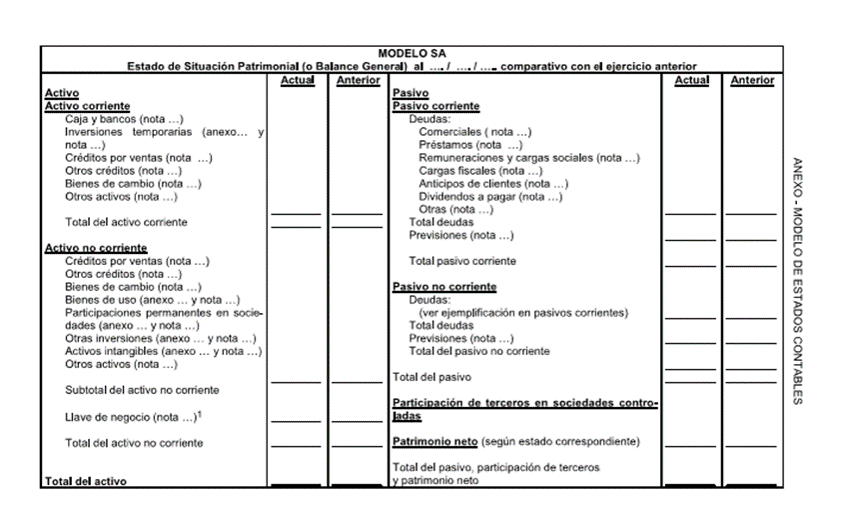

### INversiones temporales

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'rendimiento_promedio': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1],
    'volatilidad': [0.1, 0.12, 0.15, 0.18, 0.5, 0.2, 0.22],
    'numero_transacciones': [10, 12, 15, 18, 5, 20, 22]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)



En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de inversiones, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de transacciones.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

##control inventarios

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ajustes_inventario': [1, 2, 3, 4, 30, 5, 6],
    'rotacion_inventario': [10, 12, 15, 18, 5, 20, 22],
    'descuentos': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de inventario y transacciones, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de inventario y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.

###otros activos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'valor_intangibles': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
    'depreciacion_activos_fijos': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'rendimiento_inversiones': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de "otros activos", incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en el valor de los activos intangibles, la depreciación de los activos fijos y el rendimiento de las inversiones a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar los datos de "otros activos" de la empresa con los de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros relacionados con "otros activos".
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con "otros activos" solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## ACTIVOS INTANGIBLES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'valor_intangible': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
    'amortizacion_anual': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'vida_util_estimada': [5, 5, 5, 5, 1, 5, 5]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de valoraciones de activos intangibles, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en la valoración de los activos intangibles a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar la valoración de los activos intangibles de la empresa con la de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Revisión de la documentación:
Examinar la documentación de respaldo para la valoración de los activos intangibles, como informes de valoración y contratos.
Verificar la razonabilidad de las suposiciones y proyecciones utilizadas en la valoración.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros relacionados con los activos intangibles.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los activos intangibles solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## otro algoritmo

In [ ]:
df

In [ ]:
df.anomalia.value_counts()

In [ ]:
## cambiar nombre de columna anomalia por fraude y sus valores
df.rename(columns={'anomalia': 'fraude'}, inplace=True)
df.fraude.value_counts()

In [ ]:
## cambiar el contenido de la columna de fraude por 0 y 1
df.fraude = df.fraude.map({-1:0,1:1})
df.fraude.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    # Supongamos que tienes tus datos en un DataFrame llamado 'df'
    # y la columna 'fraude' indica si hubo fraude (1) o no (0)

X = df.drop('fraude', axis=1)  # Características
y = df['fraude']  # Variable objetivo

    # Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

    # Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

1. Cargar desde un archivo CSV:

Si tus datos están en un archivo CSV (valores separados por comas), puedes usar la función read_csv() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_csv('nombre_del_archivo.csv')

# Para visualizar los primeros registros del DataFrame
print(df.head())

1. Cargar desde un archivo CSV:

Si tus datos están en un archivo CSV (valores separados por comas), puedes usar la función read_csv() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_excel('nombre_del_archivo.xlsx', sheet_name='nombre_de_la_hoja') # puedes omitir sheet_name si solo hay una hoja

# Para visualizar los primeros registros del DataFrame
print(df.head())

3. Cargar desde una base de datos SQL:

Si tus datos están en una base de datos SQL, puedes usar la función read_sql() de Pandas junto con una conexión a la base de datos:

In [ ]:
import pandas as pd
import sqlite3 # o otro conector de base de datos como psycopg2 para PostgreSQL

# Establecer la conexión a la base de datos
conn = sqlite3.connect('nombre_de_la_base_de_datos.db')

# Ejecutar una consulta SQL y cargar los resultados en un DataFrame
query = 'SELECT * FROM nombre_de_la_tabla'
df = pd.read_sql(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Para visualizar los primeros registros del DataFrame
print(df.head())

4. Cargar desde un diccionario de Python:

Si tus datos están en un diccionario de Python, puedes usar el constructor DataFrame() de Pandas:

In [ ]:
import pandas as pd

data = {
    'columna1': [1, 2, 3, 4, 5],
    'columna2': ['a', 'b', 'c', 'd', 'e'],
    'columna3': [True, False, True, False, True]
}

df = pd.DataFrame(data)

# Para visualizar los primeros registros del DataFrame
print(df.head())

5. Cargar desde un archivo JSON:

Si tus datos están en un archivo JSON, puedes usar la función read_json() de Pandas:

In [ ]:
import pandas as pd

df = pd.read_json('nombre_del_archivo.json')

# Para visualizar los primeros registros del DataFrame
print(df.head())

6. Cargar desde una lista de listas:

Si tus datos están en una lista de listas, puedes usar el constructor DataFrame() de Pandas:

In [ ]:
import pandas as pd

data = [
    [1, 'a', True],
    [2, 'b', False],
    [3, 'c', True],
    [4, 'd', False],
    [5, 'e', True]
]

df = pd.DataFrame(data, columns=['columna1', 'columna2', 'columna3']) # puedes especificar los nombres de las columnas

# Para visualizar los primeros registros del DataFrame
print(df.head())

Recomendaciones:

Asegúrate de que el archivo o la base de datos estén en la misma ubicación que tu script de Python, o especifica la ruta completa.
Si tienes problemas con la codificación de caracteres, puedes especificar el parámetro encoding en las funciones read_csv() y read_excel().
Si tienes datos faltantes, puedes usar el parámetro na_values en las funciones de lectura para especificar los valores que deben considerarse como faltantes.
Espero que esto te ayude a cargar tus datos en un DataFrame de Pandas.

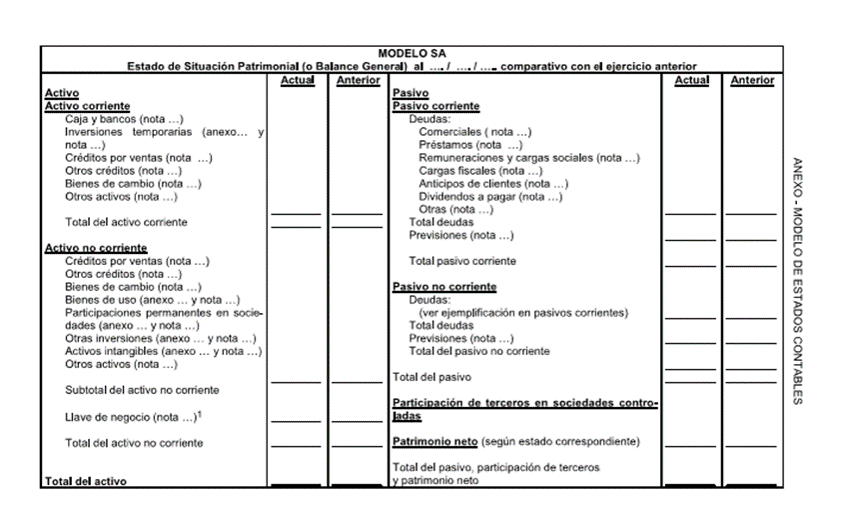

## proveedores

1. Preparación de datos (ejemplo simplificado)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'monto_promedio_facturas': [1000, 1200, 1500, 1800, 5000, 2000, 2200],
    'numero_facturas': [10, 12, 15, 18, 5, 20, 22],
    'dias_promedio_pago': [30, 30, 30, 30, 10, 30, 30]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

**3. Interpretación de resultados:**

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de proveedores, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de proveedores y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre proveedores y empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar las descripciones de las facturas para detectar palabras clave o frases que puedan indicar fraude.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de proveedores para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de proveedores.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los proveedores solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

### prestamos obtenidos

In [ ]:
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
    data = {
        'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
        'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
        'monto_prestamo': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
        'relacion_deuda_ingresos': [0.2, 0.3, 0.25, 0.35, 1.0, 0.2, 0.25]
    }

    df = pd.DataFrame(data)
    df

In [ ]:
  # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'ingresos': [50000, 60000, 70000, 80000, 10000, 90000, 100000],
    'puntaje_crediticio': [700, 750, 800, 850, 500, 900, 950],
    'monto_prestamo': [10000, 12000, 15000, 18000, 50000, 20000, 22000],
    'relacion_deuda_ingresos': [0.2, 0.3, 0.25, 0.35, 1.0, 0.2, 0.25]
}

df = pd.DataFrame(data)

# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de solicitudes de préstamos, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de verificación de identidad y validación de documentos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre solicitantes y otros actores (por ejemplo, empleados de la institución financiera) para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar los documentos presentados por los solicitantes para detectar inconsistencias o falsificaciones.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de préstamos para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de préstamos.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los préstamos solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## remuneraciones y cargas sociales

1. Preparación de datos (ejemplo simplificado):

In [ ]:
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
    data = {
        'salario_promedio': [2000, 2200, 2500, 2800, 10000, 3000, 3200],
        'horas_extras_promedio': [10, 12, 15, 18, 50, 20, 22],
        'numero_cuentas_bancarias': [1, 1, 1, 1, 3, 1, 1],
        'cambios_direccion': [0, 0, 0, 1, 3, 0, 0]
    }

    df = pd.DataFrame(data)
    df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
  # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de nómina y empleados, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de nómina y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar los registros de horas trabajadas para detectar inconsistencias o falsificaciones.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de nómina para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de nómina.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con la nómina solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## anticipo de clientes

1. Preparación de datos (ejemplo simplificado):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
    'monto_anticipo_promedio': [1000, 1200, 1500, 1800, 5000, 2000, 2200],
    'numero_anticipos': [10, 12, 15, 18, 5, 20, 22],
    'dias_promedio_anticipo': [30, 30, 30, 30, 10, 30, 30],
    'descuentos_anticipo': [0, 0, 0, 1, 5, 0, 0]
}

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
# Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

# Predecir anomalías
anomalies = model.predict(df)

# Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

# Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de anticipos de clientes, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de gestión de clientes y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de redes:
Analizar las relaciones entre clientes y empleados para identificar posibles colusiones.
Utilizar herramientas de análisis de redes para visualizar y detectar patrones sospechosos.
Análisis de texto:
Analizar las descripciones de los anticipos para detectar palabras clave o frases que puedan indicar fraude.
Utilizar técnicas de procesamiento de lenguaje natural (NLP) para extraer información relevante de los textos.
Alertas y notificaciones:
Configurar alertas para detectar transacciones sospechosas en tiempo real.
Enviar notificaciones a los responsables de la gestión de anticipos para que investiguen los casos sospechosos.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de los registros de anticipos.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con los anticipos solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

## previsiones

1. Preparación de datos (ejemplo simplificado):

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
        'ingresos_proyectados': [100000, 120000, 150000, 180000, 500000, 200000, 220000],
        'gastos_proyectados': [80000, 90000, 110000, 130000, 400000, 150000, 160000],
        'flujo_efectivo_proyectado': [20000, 30000, 40000, 50000, 100000, 50000, 60000],
        'variacion_ingresos_reales': [0.05, 0.06, 0.07, 0.08, 0.5, 0.09, 0.1]
    }

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
 # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

3. Interpretación de resultados:

En la columna "anomalia", los valores -1 indican anomalías (posibles fraudes) y los valores 1 indican valores normales.
Explicación:

Este código utiliza el algoritmo Isolation Forest, que es eficaz para detectar anomalías en datos multidimensionales.
El parámetro "contamination" controla la proporción esperada de anomalías en los datos.
El modelo "aprende" los patrones normales en los datos y luego identifica los puntos de datos que se desvían significativamente de esos patrones.
Consideraciones importantes:

Este es un ejemplo simplificado. En un sistema de detección de fraude real, necesitarías:
Una gran cantidad de datos históricos de previsiones financieras, incluyendo casos de fraude conocidos.
Preprocesamiento de datos más sofisticado, incluyendo la codificación de variables categóricas y la normalización de variables numéricas.
Evaluación rigurosa del modelo utilizando métricas como precisión, recuperación y F1-score.
Integración con sistemas de contabilidad y bases de datos.
Monitoreo continuo del rendimiento del modelo y reentrenamiento periódico para adaptarlo a las nuevas tendencias de fraude.
Es importante comprender que el aprendizaje automático es una herramienta, y la detección de fraude requiere una combinación de experiencia humana y análisis de datos.
Recomendaciones Adicionales:

Análisis de tendencias:
Monitorear las tendencias en las previsiones a lo largo del tiempo.
Identificar cambios bruscos o inusuales en estas tendencias.
Análisis comparativo:
Comparar las previsiones de la empresa con las de empresas similares en la misma industria.
Identificar diferencias significativas que puedan indicar un fraude.
Revisión de la documentación:
Examinar la documentación de respaldo para las previsiones, como modelos financieros y supuestos.
Verificar la razonabilidad de las suposiciones y proyecciones utilizadas.
Auditorías internas:
Realizar auditorías internas periódicas para verificar la exactitud de las previsiones.
Prestar especial atención a las áreas de mayor riesgo.
Control de acceso:
Limitar el acceso a los sistemas y registros relacionados con las previsiones solo al personal autorizado.
Implementar controles de acceso sólidos para prevenir el acceso no autorizado.
Cultura de ética:
Fomentar una cultura de ética y transparencia en la empresa.
Proporcionar capacitación al personal sobre la prevención del fraude.
Recuerda que la prevención y detección de fraudes es un proceso continuo que requiere una combinación de tecnología, controles internos y experiencia humana.

### remuneraciones pagadas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

    # Crear datos de ejemplo (reemplaza esto con tus datos reales)
data = {
        'salario_declarado': [2000, 2200, 2500, 2800, 10000, 3000, 3200],
        'horas_trabajadas': [160, 160, 160, 160, 80, 160, 160],
        'antiguedad_laboral': [1, 2, 3, 4, 10, 5, 6],
        'descuentos_aportes': [400, 440, 500, 560, 2000, 600, 640]
    }

df = pd.DataFrame(data)
df

2. Entrenamiento del modelo de detección de anomalías (Isolation Forest):

In [ ]:
   # Entrenar el modelo Isolation Forest
model = IsolationForest(contamination=0.1)  # Contamination: proporción estimada de anomalías
model.fit(df)

    # Predecir anomalías
anomalies = model.predict(df)

    # Agregar la columna de anomalías al DataFrame
df['anomalia'] = anomalies

    # Imprimir el DataFrame con las anomalías detectadas
print(df)

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.anomaly import *

In [ ]:
anomaly = setup(df, normalize = True)

In [ ]:
models()

In [ ]:
iforest = create_model('iforest')
iforest

In [ ]:
anomalias = assign_model(iforest)
anomalias

In [ ]:
knn = create_model('knn')
knn

In [ ]:
anomalias1 = assign_model(knn)
anomalias1

In [ ]:
pca = create_model('pca')
pca

In [ ]:
anomalias2 = assign_model(pca)
anomalias2

In [ ]:
df

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    # Supongamos que tienes tus datos en un DataFrame llamado 'df'
    # y la columna 'fraude' indica si hubo fraude (1) o no (0)

    X = df.drop('fraude', axis=1)  # Características
    y = df['fraude']  # Variable objetivo

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión del modelo: {accuracy}')

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo (simulados)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}

df = pd.DataFrame(data)

# 1.1 Definición y Tipos de Fraude / 1.2 Definición y Manifestaciones de la Corrupción
# Podemos categorizar los datos según el tipo y la descripción para entender las manifestaciones.

print("Tipos de Eventos:")
print(df['Tipo'].value_counts())
print("\nEjemplos de Descripciones:")
print(df[['Tipo', 'Descripción']])

# 1.3 Impacto Económico y Social del Fraude y la Corrupción
# Podemos analizar los montos para tener una idea del impacto económico (simplificado).

print("\nAnálisis de Montos (Impacto Económico Potencial):")
print("Monto Total de Eventos Sospechosos:", df[df['Estado'] == 'Sospechoso']['Monto'].sum())
print("Monto Total de Eventos Investigados:", df[df['Estado'] == 'Investigado']['Monto'].sum())

# 1.4 La Necesidad de Nuevas Herramientas para Combatir el Fraude y la Corrupción
# Visualización básica para ilustrar la frecuencia de los tipos de eventos y su estado.

plt.figure(figsize=(10, 5))
sns.countplot(x='Tipo', hue='Estado', data=df)
plt.title('Frecuencia de Tipos de Eventos por Estado')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Monto'], bins=5, kde=True)
plt.title('Distribución de Montos de Eventos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
import pandas as pd

data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}

df = pd.DataFrame(data)
df

Nuevo Análisis:

**Análisis Temporal (1.3 Impacto Económico y Social): Podemos analizar la evolución de los eventos sospechosos a lo largo del tiempo.**

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df_sorted = df.sort_values(by='Fecha')
print("\nEventos Sospechosos por Fecha:")
print(df_sorted[df_sorted['Estado'] == 'Sospechoso'][['Fecha', 'Descripción', 'Monto']])

**Agrupación por Tipo y Estado (1.1 y 1.2): Podemos ver cuántos eventos de cada tipo están en cada estado.**


In [ ]:
print("\nConteo de Eventos por Tipo y Estado:")
print(df.groupby(['Tipo', 'Estado']).size().reset_index(name='Conteo'))

**Identificación de "Bandera Roja" (1.1 y 1.2): Podemos buscar patrones o montos que podrían considerarse "banderas rojas" o indicadores de posibles problemas.**

In [ ]:
umbral_monto_alto = 50000
print("\nEventos con Montos Altos (Potencialmente Significativos):")
print(df[df['Monto'] > umbral_monto_alto][['Tipo', 'Descripción', 'Monto', 'Estado']])

**Análisis de Palabras Clave en la Descripción (Conceptual para 1.1 y 1.2): Aunque no es un análisis NLP avanzado, podemos buscar palabras clave que sugieran fraude o corrupción.**

In [ ]:
palabras_clave_fraude = ['transferencia inusual', 'retiro efectivo', 'compra sospechosa', 'paraíso fiscal']
palabras_clave_corrupcion = ['soborno', 'malversación', 'funcionario público']

def identificar_palabras_clave(row, palabras):
    for palabra in palabras:
        if palabra.lower() in row['Descripción'].lower():
            return True
    return False

df['Es_Fraude'] = df.apply(lambda row: identificar_palabras_clave(row, palabras_clave_fraude), axis=1)
df['Es_Corrupcion'] = df.apply(lambda row: identificar_palabras_clave(row, palabras_clave_corrupcion), axis=1)

print("\nIdentificación de Palabras Clave en Descripción:")
print(df[['Descripción', 'Es_Fraude', 'Es_Corrupcion']])

**Capítulo 2: Introducción a los Algoritmos y la Inteligencia Artificial**
2.1 ¿Qué son los Algoritmos? Conceptos Básicos
2.2 Tipos de Algoritmos Relevantes para la Detección de Fraude y Corrupción
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático (Machine Learning)
2.4 Ética y Sesgos en los Algoritmos



Un Algoritmo Simple: Un algoritmo para encontrar el número mayor en una lista. **texto en negrita**
Tipos de Algoritmos Relevantes (Conceptualmente):
Clasificación: Un ejemplo muy básico de cómo clasificar datos.
Agrupamiento (Clustering): Una demostración de cómo agrupar datos similares.

In [ ]:
import random
from collections import defaultdict

# 2.1 ¿Qué son los Algoritmos? Conceptos Básicos

def encontrar_mayor(lista):
    """Algoritmo para encontrar el número mayor en una lista."""
    if not lista:
        return None
    mayor = lista[0]
    for numero in lista:
        if numero > mayor:
            mayor = numero
    return mayor

# Ejemplo de uso
numeros = [5, 2, 8, 1, 9, 4]
mayor_numero = encontrar_mayor(numeros)
print(f"\n2.1 Algoritmo Simple: El número mayor en {numeros} es: {mayor_numero}")

# 2.2 Tipos de Algoritmos Relevantes para la Detección de Fraude y Corrupción

# Ejemplo muy básico de Clasificación (simulando una clasificación simple)
def clasificar_transaccion(monto):
    """Clasifica una transacción como 'Baja', 'Media' o 'Alta'."""
    if monto < 100:
        return 'Baja'
    elif monto < 1000:
        return 'Media'
    else:
        return 'Alta'

transacciones = [50, 500, 1500, 20, 1200]
print("\n2.2 Ejemplo Básico de Clasificación:")
for monto in transacciones:
    print(f"La transacción de ${monto} es clasificada como: {clasificar_transaccion(monto)}")

# Ejemplo muy básico de Agrupamiento (simulando agrupar datos similares)
def agrupar_por_rango(valor, rangos):
    """Agrupa un valor en un rango predefinido."""
    for rango, etiqueta in rangos.items():
        if valor in rango:
            return etiqueta
    return 'Otro'

valores = [10, 25, 110, 500, 1005, 15]
rangos_agrupamiento = {
    range(0, 50): 'Grupo A',
    range(50, 500): 'Grupo B',
    range(500, 1000): 'Grupo C'
}
print("\n2.2 Ejemplo Básico de Agrupamiento:")
for valor in valores:
    grupo = agrupar_por_rango(valor, rangos_agrupamiento)
    print(f"El valor {valor} pertenece al grupo: {grupo}")

# 2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático (Machine Learning)
# Ejemplo conceptual de cómo un algoritmo podría "aprender" (muy simplificado)

# Simulación de datos etiquetados (fraudulento o no)
datos_entrenamiento = [
    {'monto': 100, 'frecuencia': 1, 'etiqueta': 'No Fraudulento'},
    {'monto': 5000, 'frecuencia': 1, 'etiqueta': 'Fraudulento'},
    {'monto': 200, 'frecuencia': 3, 'etiqueta': 'No Fraudulento'},
    {'monto': 7000, 'frecuencia': 2, 'etiqueta': 'Fraudulento'},
    {'monto': 150, 'frecuencia': 2, 'etiqueta': 'No Fraudulento'}
]

# Un modelo muy simplificado (si el monto es alto y la frecuencia baja, es fraudulento)
def modelo_aprendizaje_simple(transaccion):
    if transaccion['monto'] > 4000 and transaccion['frecuencia'] < 3:
        return 'Posiblemente Fraudulento'
    else:
        return 'No Sospechoso'

print("\n2.3 Ejemplo Conceptual de Aprendizaje Automático (Muy Simplificado):")
transaccion_nueva = {'monto': 6000, 'frecuencia': 1}
resultado = modelo_aprendizaje_simple(transaccion_nueva)
print(f"La transacción {transaccion_nueva} se clasifica como: {resultado}")

transaccion_nueva_2 = {'monto': 300, 'frecuencia': 5}
resultado_2 = modelo_aprendizaje_simple(transaccion_nueva_2)
print(f"La transacción {transaccion_nueva_2} se clasifica como: {resultado_2}")

# 2.4 Ética y Sesgos en los Algoritmos
# Ejemplo conceptual de cómo un sesgo en los datos podría afectar un modelo (muy simplificado)

# Datos de entrenamiento con un sesgo (más transacciones 'altas' para un tipo de usuario)
datos_sesgados = [
    {'tipo_usuario': 'A', 'monto': 100, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 5000, 'etiqueta': 'Fraudulento'},
    {'tipo_usuario': 'A', 'monto': 200, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 7000, 'etiqueta': 'Fraudulento'},
    {'tipo_usuario': 'A', 'monto': 150, 'etiqueta': 'No Fraudulento'},
    {'tipo_usuario': 'B', 'monto': 1000, 'etiqueta': 'No Fraudulento'} # Menos ejemplos de 'No Fraudulento' para B
]

def modelo_sesgado_simple(transaccion):
    if transaccion['tipo_usuario'] == 'B' and transaccion['monto'] > 800:
        return 'Sospechoso'
    else:
        return 'No Sospechoso'

print("\n2.4 Ejemplo Conceptual de Sesgo en Algoritmos (Muy Simplificado):")
transaccion_usuario_a = {'tipo_usuario': 'A', 'monto': 900}
resultado_a = modelo_sesgado_simple(transaccion_usuario_a)
print(f"Transacción usuario A ({transaccion_usuario_a}): {resultado_a}")

transaccion_usuario_b = {'tipo_usuario': 'B', 'monto': 900}
resultado_b = modelo_sesgado_simple(transaccion_usuario_b)
print(f"Transacción usuario B ({transaccion_usuario_b}): {resultado_b}")

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df = pd.DataFrame(data)

# 2. Preprocesamiento Básico (para algunos algoritmos)
# Convertir 'Monto' a un formato numérico si no lo estuviera ya.
# En este caso, ya es numérico.

# 3. Ejemplo de Agrupamiento (Clustering) - Capítulo 2.2
# Intentamos agrupar las transacciones basándonos en el 'Monto'.
# Esto es una simplificación, en un caso real se usarían más características.

if 'Monto' in df.columns:
    monto_array = df[['Monto']].values
    scaler = StandardScaler()
    monto_scaled = scaler.fit_transform(monto_array)

    n_clusters = 2  # Intentamos agrupar en 2 grupos (ej: montos bajos y altos)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Grupo_Monto'] = kmeans.fit_predict(monto_scaled)

    print("\nEjemplo de Agrupamiento (K-Means) basado en Monto:")
    print(df[['Descripción', 'Monto', 'Grupo_Monto']])
else:
    print("\nNo se puede realizar el agrupamiento porque la columna 'Monto' no está presente.")

# 4. Ejemplo Básico de Clasificación (Aprendizaje Supervisado) - Capítulo 2.2 y 2.3
# Creamos una columna binaria para clasificar si un evento es 'Sospechoso' o no.

if 'Estado' in df.columns:
    df['Es_Sospechoso'] = df['Estado'].apply(lambda x: 1 if x == 'Sospechoso' else 0)

    # Seleccionamos una característica numérica para la clasificación (Monto)
    if 'Monto' in df.columns:
        X = df[['Monto']]
        y = df['Es_Sospechoso']

        # Dividimos los datos en entrenamiento y prueba (muy simplificado)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Entrenamos un modelo de regresión logística (un clasificador simple)
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

        # Realizamos predicciones
        y_pred = model.predict(X_test)

        # Evaluamos el modelo (muy básico con pocos datos)
        print("\nEjemplo Básico de Clasificación (Regresión Logística):")
        print("Predicciones:", y_pred)
        print("Valores Reales:", y_test.values)
        print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
        print("\nReporte de Clasificación:")
        print(classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
    else:
        print("\nNo se puede realizar la clasificación porque la columna 'Monto' no está presente.")
else:
    print("\nNo se puede realizar la clasificación porque la columna 'Estado' no está presente.")

# 5. Ejemplo Conceptual de Sesgo (Capítulo 2.4)
# Imaginemos que el 'Monto' es la única característica y que los eventos 'Investigado'
# son más comunes en un cierto rango de montos, lo que podría influir en el modelo.
# Esto es una simplificación extrema para ilustrar el concepto.

if 'Monto' in df.columns and 'Estado' in df.columns:
    print("\nEjemplo Conceptual de Sesgo (Influencia del Monto en la Clasificación):")
    print(df[['Monto', 'Estado']])
    # Si la mayoría de 'Investigado' tiene montos medios, el modelo podría
    # aprender a asociar montos medios con 'Investigado', incluso si no es la causa.
    # Con pocos datos, es difícil demostrar un sesgo claro, pero se ilustra la idea.

# 6. Consideraciones Éticas (Implícitas)
print("\nConsideraciones Éticas Implícitas:")
print("Es importante notar que estos modelos se entrenan con datos y pueden reflejar")
print("sesgos presentes en esos datos. La interpretación de los resultados debe ser")
print("cuidadosa y considerar el contexto de los datos.")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df = pd.DataFrame(data)

# 7. Ejemplo de Análisis de Texto (NLP) - Capítulo 2.2 y 2.3
# Analizamos la columna 'Descripción' para encontrar similitudes.

if 'Descripción' in df.columns:
    stop_words = set(stopwords.words('spanish'))

    def preprocess_text(text):
        if isinstance(text, str):
            text = text.lower()
            words = text.split()
            words = [word for word in words if word not in stop_words]
            return " ".join(words)
        return ""

    df['Descripción_Procesada'] = df['Descripción'].apply(preprocess_text)

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['Descripción_Procesada'])

    # Calculamos la similitud del coseno entre las descripciones
    similitud_coseno = cosine_similarity(tfidf_matrix)

    similitud_df = pd.DataFrame(similitud_coseno, index=df['Descripción'], columns=df['Descripción'])

    print("\n7. Ejemplo de Análisis de Texto (Similitud de Coseno entre Descripciones):")
    print(similitud_df)

    # Podemos identificar descripciones similares (por ejemplo, con una similitud > 0.5)
    print("\nDescripciones con Alta Similitud:")
    for i in range(len(similitud_df.index)):
        for j in range(i + 1, len(similitud_df.columns)):
            if similitud_df.iloc[i, j] > 0.5:
                print(f"'{similitud_df.index[i]}' es similar a '{similitud_df.columns[j]}' (Similitud: {similitud_df.iloc[i, j]:.2f})")

else:
    print("\nNo se puede realizar el análisis de texto porque la columna 'Descripción' no está presente.")

# 8. Ejemplo de Detección de Anomalías (Conceptual) - Capítulo 2.2
# Identificamos transacciones con montos significativamente diferentes a la media.

if 'Monto' in df.columns:
    media_monto = df['Monto'].mean()
    desviacion_estandar_monto = df['Monto'].std()
    umbral_anomalia = 2  # Por ejemplo, 2 desviaciones estándar

    df['Es_Anomalia_Monto'] = abs(df['Monto'] - media_monto) > umbral_anomalia * desviacion_estandar_monto

    print("\n8. Ejemplo Conceptual de Detección de Anomalías (Basado en Monto):")
    print(df[['Descripción', 'Monto', 'Es_Anomalia_Monto']])
else:
    print("\nNo se puede realizar la detección de anomalías porque la columna 'Monto' no está presente.")

# 9. Ejemplo de Análisis de Fechas (Conceptual para 1.3)
# Podríamos buscar patrones en la frecuencia de eventos en ciertos periodos.
# Esto es muy básico con pocos datos, pero ilustra la idea.

if 'Fecha' in df.columns:
    # Convert 'Fecha' column to datetime objects
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Mes'] = df['Fecha'].dt.month
    print("\n9. Ejemplo Conceptual de Análisis de Fechas (Conteo de Eventos por Mes):")
    print(df['Mes'].value_counts().sort_index())
else:
    print("\nNo se puede realizar el análisis de fechas porque la columna 'Fecha' no está presente.")

Parte 2: Algoritmos para la Detección de Fraude
**Capítulo 3: Algoritmos para la Detección de Fraude Financiero **
3.1 Detección de Transacciones Fraudulentas en Sistemas Bancarios
3.2 Detección de Fraude con Tarjetas de Crédito y Débito
3.3 Análisis de Patrones Sospechosos en Seguros
3.4 Algoritmos para la Detección de Blanqueo de Capitales


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# ... (rest of the code is the same)

# 3.1 Detección de Transacciones Fraudulentas en Sistemas Bancarios
print("\n3.1 Detección de Transacciones Fraudulentas (Ejemplo con Regresión Logística):")
if 'Monto' in df_fraude.columns and 'Tiempo' in df_fraude.columns and 'Es_Fraudulenta' in df_fraude.columns:
    X = df_fraude[['Monto', 'Tiempo']]
    y = df_fraude['Es_Fraudulenta']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model_bancario = LogisticRegression(random_state=42)
    model_bancario.fit(X_train, y_train)
    y_pred_bancario = model_bancario.predict(X_test)

    print("Predicciones:", y_pred_bancario)
    print("Valores Reales:", y_test.values)
    print("Precisión del Modelo:", accuracy_score(y_test, y_pred_bancario))
    print("\nReporte de Clasificación:")

    # Get unique labels in y_test and y_pred_bancario
    labels = np.unique(np.concatenate((y_test, y_pred_bancario)))

    # Define target_names based on unique labels
    target_names = ['No Fraudulenta' if label == 0 else 'Fraudulenta' for label in labels]

    print(classification_report(y_test, y_pred_bancario, labels=labels, target_names=target_names)) # Changed line

else:
    print("\nNo se pueden realizar análisis para 3.1 porque faltan columnas necesarias.")

# 3.2 Detección de Fraude con Tarjetas de Crédito y Débito
print("\n3.2 Detección de Fraude con Tarjetas de Crédito y Débito (Ejemplo con Detección de Anómalos - Isolation Forest):")
if 'Monto' in df_fraude.columns and 'Tiempo' in df_fraude.columns:
    # Usamos Isolation Forest para detectar transacciones atípicas
    X_anomalias = df_fraude[['Monto', 'Tiempo']]
    scaler = StandardScaler()
    X_scaled_anomalias = scaler.fit_transform(X_anomalias)

    iforest = IsolationForest(random_state=42)
    iforest.fit(X_scaled_anomalias)
    anomalias_pred = iforest.predict(X_scaled_anomalias) # -1: Anómalo, 1: Normal

    df_fraude['Es_Anomalo'] = anomalias_pred
    print(df_fraude[['Tipo_Transaccion', 'Monto', 'Tiempo', 'Es_Anomalo']])
else:
    print("\nNo se pueden realizar análisis para 3.2 porque faltan columnas necesarias.")

# 3.3 Análisis de Patrones Sospechosos en Seguros (Ejemplo Conceptual)
print("\n3.3 Análisis de Patrones Sospechosos en Seguros (Ejemplo Conceptual):")
# Supongamos que tuviéramos datos de reclamos de seguros con información como:
# Tipo de Reclamo, Monto Reclamado, Fecha del Reclamo, Historial del Cliente, etc.

# Un análisis conceptual podría ser:
# - Identificar reclamos con montos inusualmente altos.
# - Buscar reclamos repetidos del mismo cliente en un corto período.
# - Analizar la frecuencia de reclamos por tipo de siniestro.

# Ejemplo muy simplificado: Buscamos reclamos con montos mayores a un umbral.
if 'Monto' in df_fraude.columns:
    umbral_seguros = 20000
    reclamos_sospechosos = df_fraude[df_fraude['Monto'] > umbral_seguros]
    if not reclamos_sospechosos.empty:
        print("\nReclamos Potencialmente Sospechosos (Monto Alto):")
        print(reclamos_sospechosos[['Tipo_Transaccion', 'Monto']])
    else:
        print("\nNo se encontraron reclamos con montos significativamente altos en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 3.3 porque falta la columna 'Monto'.")

# 3.4 Algoritmos para la Detección de Blanqueo de Capitales (Ejemplo Conceptual)
print("\n3.4 Algoritmos para la Detección de Blanqueo de Capitales (Ejemplo Conceptual):")
# En este caso, se buscarían patrones de transacciones que podrían indicar lavado de dinero,
# como múltiples transacciones pequeñas a diferentes cuentas, transferencias a paraísos fiscales, etc.

# Ejemplo muy simplificado: Identificamos transferencias a 'paraíso fiscal' (basado en la descripción).
if 'Descripción' in df_fraude.columns:
    transferencias_paraiso = df_fraude[df_fraude['Descripción'].str.contains('paraíso fiscal', case=False)]
    if not transferencias_paraiso.empty:
        print("\nTransferencias Potencialmente Sospechosas (a 'paraíso fiscal'):")
        print(transferencias_paraiso[['Tipo_Transaccion', 'Descripción', 'Monto']])
    else:
        print("\nNo se encontraron transferencias a 'paraíso fiscal' en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 3.4 porque falta la columna 'Descripción'.")

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

# 1. Cargamos el dataset (mismo ejemplo)
data = {
    'Tipo': ['Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Denuncia de Corrupción', 'Transacción Bancaria', 'Transacción Bancaria'],
    'Descripción': ['Transferencia inusual a cuenta desconocida', 'Denuncia de soborno a funcionario público', 'Retiro de gran cantidad en efectivo', 'Denuncia de malversación de fondos', 'Compra sospechosa online', 'Transferencia a paraíso fiscal'],
    'Monto': [15000, 5000, 10000, 250000, 750, 80000],
    'Fecha': ['2023-10-26', '2024-01-15', '2023-11-05', '2024-03-10', '2024-02-20', '2024-03-01'],
    'Estado': ['Sospechoso', 'Investigado', 'Sospechoso', 'Investigado', 'Sospechoso', 'Sospechoso']
}
df = pd.DataFrame(data)

# 10. Ejemplo de Agrupamiento Basado en Texto y Monto (Capítulo 2.2)
print("\n10. Ejemplo de Agrupamiento Basado en Texto y Monto (DBSCAN):")
if 'Descripción' in df.columns and 'Monto' in df.columns:
    # Codificar la descripción para usarla en el agrupamiento (una simplificación)
    le = LabelEncoder()
    df['Descripción_Codificada'] = le.fit_transform(df['Descripción'])

    # Seleccionamos las características para el agrupamiento
    features_agrupamiento = df[['Monto', 'Descripción_Codificada']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_agrupamiento)

    # Aplicamos DBSCAN
    # eps: distancia máxima entre dos muestras para que una sea considerada vecina de la otra.
    # min_samples: número mínimo de puntos requeridos para formar un clúster.
    dbscan = DBSCAN(eps=1, min_samples=2)
    df['Grupo_DBSCAN'] = dbscan.fit_predict(features_scaled)

    print("Resultados del Agrupamiento DBSCAN:")
    print(df[['Descripción', 'Monto', 'Grupo_DBSCAN']])
    print("\nEtiquetas de Grupo:", df['Grupo_DBSCAN'].unique())
else:
    print("\nNo se puede realizar el agrupamiento porque faltan columnas necesarias.")

# 11. Ejemplo de Similitud entre Descripciones con CountVectorizer (Alternativa a TF-IDF)
print("\n11. Ejemplo de Similitud entre Descripciones con CountVectorizer:")
if 'Descripción_Procesada' in df.columns:
    vectorizer_count = CountVectorizer(stop_words='spanish')
    count_matrix = vectorizer_count.fit_transform(df['Descripción_Procesada'])

    similitud_count = cosine_similarity(count_matrix)
    similitud_count_df = pd.DataFrame(similitud_count, index=df['Descripción'], columns=df['Descripción'])

    print("\nMatriz de Similitud (CountVectorizer):")
    print(similitud_count_df)

    print("\nDescripciones con Alta Similitud (CountVectorizer):")
    for i in range(len(similitud_count_df.index)):
        for j in range(i + 1, len(similitud_count_df.columns)):
            if similitud_count_df.iloc[i, j] > 0.5:
                print(f"'{similitud_count_df.index[i]}' es similar a '{similitud_count_df.columns[j]}' (Similitud: {similitud_count_df.iloc[i, j]:.2f})")
else:
    print("\nNo se puede realizar el análisis de texto porque la columna 'Descripción_Procesada' no está presente.")

# 12. Ejemplo de Cálculo de Distancia Euclídea entre Montos (Conceptual)
print("\n12. Ejemplo de Cálculo de Distancia Euclídea entre Montos (Conceptual):")
if 'Monto' in df.columns:
    montos = df['Monto'].values.reshape(-1, 1) # Necesitamos una matriz 2D para euclidean_distances
    distancias_euclidea = euclidean_distances(montos)
    distancias_df = pd.DataFrame(distancias_euclidea, index=df['Descripción'], columns=df['Descripción'])
    print("\nMatriz de Distancias Euclídeas entre Montos:")
    print(distancias_df)

    # Identificar transacciones con montos muy cercanos (distancia baja)
    print("\nTransacciones con Montos Muy Similares (Distancia Euclídea Baja):")
    for i in range(len(distancias_df.index)):
        for j in range(i + 1, len(distancias_df.columns)):
            if 0 < distancias_df.iloc[i, j] < 1000: # Ejemplo de umbral
                print(f"'{distancias_df.index[i]}' y '{distancias_df.columns[j]}' tienen montos cercanos (Distancia: {distancias_df.iloc[i, j]:.2f})")
else:
    print("\nNo se puede realizar el cálculo de distancia euclídea porque la columna 'Monto' no está presente.")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# 1. Cargar un dataset simulado de transacciones de tarjetas de crédito
# En un escenario real, se cargaría un archivo CSV o se accedería a una base de datos.
# Este dataset simulado tiene menos características para simplificar el ejemplo.
data_tarjetas = {
    'ID_Transaccion': range(1, 21),
    'Monto': [120.50, 25.00, 1500.75, 50.99, 10.00, 75.20, 3000.00, 18.95, 99.99, 5000.00,
              110.00, 30.00, 1600.00, 60.50, 15.50, 80.10, 3500.00, 22.00, 110.00, 6000.00],
    'Tiempo_Transaccion': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                           60, 65, 70, 75, 80, 85, 90, 95, 100, 105], # Tiempo desde el inicio (ej: segundos)
    'Tipo_Comercio': ['Tienda A', 'Online', 'Joyería', 'Restaurante', 'Online', 'Tienda B', 'Electrónicos', 'Supermercado', 'Tienda A', 'Cajero'] * 2, # Repeat the list twice
    'Pais': ['Argentina', 'Argentina', 'Estados Unidos', 'Argentina', 'Argentina', 'Argentina', 'Estados Unidos', 'Argentina', 'Argentina', 'Estados Unidos'] * 2, # Repeat the list twice
    'Es_Fraude': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                  0, 0, 1, 0, 0, 0, 1, 0, 0, 1] # 0: No Fraudulenta, 1: Fraudulenta
}

df_tarjetas = pd.DataFrame(data_tarjetas)

# 2. Preprocesamiento de Datos
# Convertir variables categóricas a numéricas (one-hot encoding)
df_encoded = pd.get_dummies(df_tarjetas, columns=['Tipo_Comercio', 'Pais'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID_Transaccion']) # No es útil para el modelo

# 3. Separación de Datos en Entrenamiento y Prueba
X = df_encoded.drop('Es_Fraude', axis=1)
y = df_encoded['Es_Fraude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Escalado de Características (Opcional pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modelos de Detección de Fraude
# 5.1 Regresión Logística
print("\n5.1 Modelo de Regresión Logística para Detección de Fraude:")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

print("Predicciones (Regresión Logística):", y_pred_lr)
print("Valores Reales:", y_test.values)
print("Precisión del Modelo (Regresión Logística):", accuracy_score(y_test, y_pred_lr))
print("\nReporte de Clasificación (Regresión Logística):\n")

# Get unique labels in y_test and y_pred_lr
labels = np.unique(np.concatenate((y_test, y_pred_lr)))

# Define target_names based on unique labels
target_names = ['No Fraude' if label == 0 else 'Fraude' for label in labels]

print(classification_report(y_test, y_pred_lr, labels=labels, target_names=target_names))



# 5. Interpretación (Muy Limitada con Pocos Datos)
print("\nInterpretación (Limitada por el Tamaño del Dataset):")
print("En un dataset real, analizaríamos:")
print("- La precisión del modelo para identificar correctamente las transacciones fraudulentas.")
print("- El recall para la clase 'Fraude' (¿Cuántos fraudes se detectaron de todos los fraudes reales?).")
print("- La precisión para la clase 'No Fraude' (¿Cuántas transacciones no fraudulentas se identificaron correctamente?).")
print("- La matriz de confusión para entender los falsos positivos y falsos negativos.")


**Capítulo 4: Algoritmos para la Detección de Fraude en el Comercio Electrónico**
4.1 Identificación de Transacciones Fraudulentas en Línea
4.2 Detección de Cuentas Falsas y Actividades Maliciosas
4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Cargar un dataset simulado para fraude en comercio electrónico
data_ecommerce = {
    'ID_Transaccion': range(1, 21),
    'Monto': [50.00, 1000.50, 25.00, 150.75, 8000.00, 30.20, 1200.00, 75.99, 5000.00, 10.00,
              60.00, 1100.00, 35.50, 90.00, 15000.00, 40.75, 1300.00, 65.00, 7000.00, 20.00],
    'Fecha_Hora': ['2024-03-10 10:00', '2024-03-10 10:05', '2024-03-10 10:10', '2024-03-10 10:12', '2024-03-10 10:15',
                   '2024-03-10 10:20', '2024-03-10 10:25', '2024-03-10 10:30', '2024-03-10 10:35', '2024-03-10 10:40',
                   '2024-03-11 09:00', '2024-03-11 09:02', '2024-03-11 09:05', '2024-03-11 09:10', '2024-03-11 09:15',
                   '2024-03-11 09:20', '2024-03-11 09:25', '2024-03-11 09:30', '2024-03-11 09:35', '2024-03-11 09:40'],
    'ID_Usuario': ['user123', 'guest456', 'user789', 'user123', 'fraudster01', 'user987', 'guest456', 'user123', 'fraudster02', 'user001',
                   'user123', 'guest456', 'user789', 'user987', 'fraudster01', 'user001', 'guest456', 'user789', 'fraudster02', 'user001'],
    'Direccion_IP': ['192.168.1.10', '10.0.0.5', '192.168.1.10', '172.16.0.1', '1.2.3.4', '192.168.1.10', '10.0.0.5', '192.168.1.10', '5.6.7.8', '192.168.1.11',
                     '192.168.1.10', '10.0.0.6', '192.168.1.12', '172.16.0.2', '1.2.3.5', '192.168.1.11', '10.0.0.5', '192.168.1.10', '5.6.7.9', '192.168.1.11'],
    'Producto': ['Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador',
                 'Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador'],
    'Es_Fraudulenta': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0] # 0: No Fraudulenta, 1: Fraudulenta
}
df_ecommerce = pd.DataFrame(data_ecommerce)
df_ecommerce['Fecha_Hora'] = pd.to_datetime(df_ecommerce['Fecha_Hora'])

# 4.1 Identificación de Transacciones Fraudulentas en Línea
print("\n4.1 Identificación de Transacciones Fraudulentas en Línea (Ejemplo con Regresión Logística):")
if 'Monto' in df_ecommerce.columns and 'Fecha_Hora' in df_ecommerce.columns and 'Es_Fraudulenta' in df_ecommerce.columns:
    # Extraemos características temporales (simplificado)
    df_ecommerce['Hora'] = df_ecommerce['Fecha_Hora'].dt.hour
    df_ecommerce['Dia_Semana'] = df_ecommerce['Fecha_Hora'].dt.dayofweek # 0: Lunes, 6: Domingo

    # Codificamos variables categóricas
    df_encoded_transacciones = pd.get_dummies(df_ecommerce, columns=['Producto'], prefix='Prod', dummy_na=False)
    df_encoded_transacciones = pd.get_dummies(df_encoded_transacciones, columns=['ID_Usuario'], prefix='User', dummy_na=False, prefix_sep='_')
    df_encoded_transacciones = pd.get_dummies(df_encoded_transacciones, columns=['Direccion_IP'], prefix='IP', dummy_na=False, prefix_sep='_')

    # Seleccionamos características para el modelo
    features_transacciones = ['Monto', 'Hora', 'Dia_Semana'] + [col for col in df_encoded_transacciones.columns if col.startswith('Prod_')] + [col for col in df_encoded_transacciones.columns if col.startswith('User_')] + [col for col in df_encoded_transacciones.columns if col.startswith('IP_')]
    features_transacciones = [col for col in features_transacciones if col in df_encoded_transacciones.columns] # Aseguramos que estén presentes

    if 'Es_Fraudulenta' in df_encoded_transacciones.columns and all(feature in df_encoded_transacciones.columns for feature in features_transacciones):
        X_trans = df_encoded_transacciones[features_transacciones]
        y_trans = df_encoded_transacciones['Es_Fraudulenta']
        X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size=0.3, random_state=42)

        scaler_trans = StandardScaler()
        X_train_scaled_trans = scaler_trans.fit_transform(X_train_trans)
        X_test_scaled_trans = scaler_trans.transform(X_test_trans)

        model_ecommerce = LogisticRegression(random_state=42)
        model_ecommerce.fit(X_train_scaled_trans, y_train_trans)
        y_pred_ecommerce = model_ecommerce.predict(X_test_scaled_trans)

        print("Predicciones (Regresión Logística):", y_pred_ecommerce)
        print("Valores Reales:", y_test_trans.values)
        print("Precisión del Modelo:", accuracy_score(y_test_trans, y_pred_ecommerce))
        print("\nReporte de Clasificación:\n", classification_report(y_test_trans, y_pred_ecommerce, target_names=['No Fraude', 'Fraude']))
    else:
        print("\nNo se pueden realizar análisis para 4.1 porque faltan columnas necesarias.")
else:
    print("\nNo se pueden realizar análisis para 4.1 porque faltan columnas necesarias.")

# 4.2 Detección de Cuentas Falsas y Actividades Maliciosas
print("\n4.2 Detección de Cuentas Falsas y Actividades Maliciosas (Ejemplo con Agrupamiento - DBSCAN en IPs):")
if 'Direccion_IP' in df_ecommerce.columns:
    # Codificamos las IPs (simplificación, en realidad se analizarían patrones de uso de IPs)
    le_ip = LabelEncoder()
    df_ecommerce['IP_Codificada'] = le_ip.fit_transform(df_ecommerce['Direccion_IP'])
    ip_array = df_ecommerce[['IP_Codificada']].values
    scaler_ip = StandardScaler()
    ip_scaled = scaler_ip.fit_transform(ip_array)

    dbscan_ip = DBSCAN(eps=0.5, min_samples=2)
    df_ecommerce['Grupo_IP'] = dbscan_ip.fit_predict(ip_scaled)

    print("\nAgrupamiento de IPs (DBSCAN):")
    print(df_ecommerce[['ID_Usuario', 'Direccion_IP', 'Grupo_IP']])
    print("\nGrupos de IP:", df_ecommerce['Grupo_IP'].unique())

    # Podríamos analizar si un grupo de IP está asociado a cuentas sospechosas (ej: muchas transacciones fraudulentas).
    grupos_sospechosos = df_ecommerce.groupby('Grupo_IP')['Es_Fraudulenta'].sum()
    print("\nNúmero de Transacciones Fraudulentas por Grupo de IP:")
    print(grupos_sospechosos)
else:
    print("\nNo se puede realizar análisis para 4.2 porque falta la columna 'Direccion_IP'.")

# 4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude (Ejemplo Conceptual)
print("\n4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude (Ejemplo Conceptual):")
# Supongamos que tuviéramos más datos del comportamiento del usuario:
# - Frecuencia de compras por usuario.
# - Ubicación de las transacciones (si estuviera disponible).
# - Patrones de productos comprados.

# Ejemplo muy simplificado: Identificamos usuarios con múltiples transacciones en un corto período.
if 'ID_Usuario' in df_ecommerce.columns and 'Fecha_Hora' in df_ecommerce.columns:
    frecuencia_usuarios = df_ecommerce.groupby('ID_Usuario')['Fecha_Hora'].count().reset_index(name='Num_Transacciones')
    print("\nFrecuencia de Transacciones por Usuario:")
    print(frecuencia_usuarios)

    # Podríamos definir un umbral para identificar usuarios con mucha actividad.
    umbral_frecuencia = 3
    usuarios_alta_actividad = frecuencia_usuarios[frecuencia_usuarios['Num_Transacciones'] > umbral_frecuencia]['ID_Usuario'].tolist()
    if usuarios_alta_actividad:
        print(f"\nUsuarios con Alta Actividad ({umbral_frecuencia} o más transacciones): {usuarios_alta_actividad}")
        transacciones_alta_actividad = df_ecommerce[df_ecommerce['ID_Usuario'].isin(usuarios_alta_actividad)]
        print("\nTransacciones de Usuarios con Alta Actividad:")
        print(transacciones_alta_actividad[['ID_Usuario', 'Fecha_Hora', 'Monto', 'Es_Fraudulenta']])
    else:
        print("\nNo se encontraron usuarios con una alta frecuencia de transacciones en este ejemplo.")
else:
    print("\nNo se puede realizar análisis para 4.3 porque faltan columnas necesarias.")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. Cargar el dataset simulado para fraude en comercio electrónico
data_ecommerce = {
    'ID_Transaccion': range(1, 21),
    'Monto': [50.00, 1000.50, 25.00, 150.75, 8000.00, 30.20, 1200.00, 75.99, 5000.00, 10.00,
              60.00, 1100.00, 35.50, 90.00, 15000.00, 40.75, 1300.00, 65.00, 7000.00, 20.00],
    'Fecha_Hora': ['2024-03-10 10:00', '2024-03-10 10:05', '2024-03-10 10:10', '2024-03-10 10:12', '2024-03-10 10:15',
                   '2024-03-10 10:20', '2024-03-10 10:25', '2024-03-10 10:30', '2024-03-10 10:35', '2024-03-10 10:40',
                   '2024-03-11 09:00', '2024-03-11 09:02', '2024-03-11 09:05', '2024-03-11 09:10', '2024-03-11 09:15',
                   '2024-03-11 09:20', '2024-03-11 09:25', '2024-03-11 09:30', '2024-03-11 09:35', '2024-03-11 09:40'],
    'ID_Usuario': ['user123', 'guest456', 'user789', 'user123', 'fraudster01', 'user987', 'guest456', 'user123', 'fraudster02', 'user001',
                   'user123', 'guest456', 'user789', 'user987', 'fraudster01', 'user001', 'guest456', 'user789', 'fraudster02', 'user001'],
    'Direccion_IP': ['192.168.1.10', '10.0.0.5', '192.168.1.10', '172.16.0.1', '1.2.3.4', '192.168.1.10', '10.0.0.5', '192.168.1.10', '5.6.7.8', '192.168.1.11',
                     '192.168.1.10', '10.0.0.6', '192.168.1.12', '172.16.0.2', '1.2.3.5', '192.168.1.11', '10.0.0.5', '192.168.1.10', '5.6.7.9', '192.168.1.11'],
    'Producto': ['Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador',
                 'Laptop', 'Libro', 'Camiseta', 'Zapatos', 'Televisor', 'Auriculares', 'Mochila', 'Reloj', 'Smartphone', 'Cargador'],
    'Es_Fraudulenta': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
                       0, 0, 0, 0, 1, 0, 0, 0, 1, 0] # 0: No Fraudulenta, 1: Fraudulenta
}
df_ecommerce = pd.DataFrame(data_ecommerce)
df_ecommerce['Fecha_Hora'] = pd.to_datetime(df_ecommerce['Fecha_Hora'])

# 13. Análisis Exploratorio de Datos (EDA) - Visualizaciones
print("\n13. Análisis Exploratorio de Datos (EDA) - Visualizaciones:")

# Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Es_Fraudulenta', data=df_ecommerce)
plt.title('Distribución de Transacciones Fraudulentas')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.show()

# Distribución de Montos por Clase
plt.figure(figsize=(8, 6))
sns.histplot(data=df_ecommerce, x='Monto', hue='Es_Fraudulenta', kde=True)
plt.title('Distribución de Montos por Tipo de Transacción')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de Hora por Clase
df_ecommerce['Hora'] = df_ecommerce['Fecha_Hora'].dt.hour
plt.figure(figsize=(8, 6))
sns.countplot(data=df_ecommerce, x='Hora', hue='Es_Fraudulenta')
plt.title('Distribución de Hora de Transacción por Tipo')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()
df_ecommerce.drop('Hora', axis=1, inplace=True) # Limpiamos la columna temporal

# 14. Análisis de Correlación (entre variables numéricas y objetivo)
print("\n14. Análisis de Correlación:")
# Convertimos 'Es_Fraudulenta' a numérico para calcular la correlación
df_ecommerce['Es_Fraudulenta_Num'] = df_ecommerce['Es_Fraudulenta']
correlacion = df_ecommerce[['Monto', 'Es_Fraudulenta_Num']].corr()
print("Correlación entre Monto y Fraude:\n", correlacion)
df_ecommerce.drop('Es_Fraudulenta_Num', axis=1, inplace=True)

# 15. Ingeniería de Características (Más Profunda)
print("\n15. Ingeniería de Características (Más Profunda):")
# Ejemplo: Tiempo entre transacciones del mismo usuario (simplificado)
df_ecommerce['Tiempo_Desde_Ultima_Transaccion'] = 0
df_ecommerce = df_ecommerce.sort_values(by=['ID_Usuario', 'Fecha_Hora'])
for usuario in df_ecommerce['ID_Usuario'].unique():
    indices = df_ecommerce[df_ecommerce['ID_Usuario'] == usuario].index
    if len(indices) > 1:
        df_ecommerce.loc[indices[1:], 'Tiempo_Desde_Ultima_Transaccion'] = (df_ecommerce['Fecha_Hora'].iloc[indices[1:]].values - df_ecommerce['Fecha_Hora'].iloc[indices[:-1]].values) / np.timedelta64(1, 's')

print("\nEjemplo de Nueva Característica: Tiempo entre Transacciones:")
print(df_ecommerce[['ID_Usuario', 'Fecha_Hora', 'Tiempo_Desde_Ultima_Transaccion']].head())

# 16. Modelado con Más Características y Evaluación
print("\n16. Modelado con Más Características y Evaluación (Random Forest):")
df_encoded_avanzado = pd.get_dummies(df_ecommerce, columns=['Producto', 'ID_Usuario', 'Direccion_IP'], prefix=['Prod', 'User', 'IP'], dummy_na=False, prefix_sep='_')
df_encoded_avanzado = df_encoded_avanzado.drop(columns=['ID_Transaccion', 'Fecha_Hora'])

# Seleccionamos más características
features_avanzadas = ['Monto', 'Tiempo_Desde_Ultima_Transaccion'] + [col for col in df_encoded_avanzado.columns if col.startswith('Prod_')] + [col for col in df_encoded_avanzado.columns if col.startswith('User_')] + [col for col in df_encoded_avanzado.columns if col.startswith('IP_')]
features_avanzadas = [col for col in features_avanzadas if col in df_encoded_avanzado.columns]

if 'Es_Fraudulenta' in df_encoded_avanzado.columns and all(feature in df_encoded_avanzado.columns for feature in features_avanzadas):
    X_adv = df_encoded_avanzado[features_avanzadas]
    y_adv = df_encoded_avanzado['Es_Fraudulenta']
    X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.3, random_state=42)

    scaler_adv = StandardScaler()
    X_train_scaled_adv = scaler_adv.fit_transform(X_train_adv)
    X_test_scaled_adv = scaler_adv.transform(X_test_adv)

    model_rf_adv = RandomForestClassifier(random_state=42)
    model_rf_adv.fit(X_train_scaled_adv, y_train_adv)
    y_pred_rf_adv = model_rf_adv.predict(X_test_scaled_adv)

    print("Predicciones (Random Forest Avanzado):", y_pred_rf_adv)
    print("Precisión del Modelo (Random Forest Avanzado):", accuracy_score(y_test_adv, y_pred_rf_adv))
    print("\nReporte de Clasificación (Random Forest Avanzado):\n", classification_report(y_test_adv, y_pred_rf_adv, target_names=['No Fraude', 'Fraude']))
    print("\nMatriz de Confusión (Random Forest Avanzado):\n", confusion_matrix(y_test_adv, y_pred_rf_adv))
else:
    print("\nNo se pueden realizar análisis avanzados porque faltan columnas necesarias.")

# 17. Análisis de Importancia de Características (para el modelo RF)
if 'Es_Fraudulenta' in df_encoded_avanzado.columns and all(feature in df_encoded_avanzado.columns for feature in features_avanzadas):
    importances = model_rf_adv.feature_importances_
    feature_names = X_adv.columns
    feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Importancia de las Características en el Modelo Random Forest')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.tight_layout()
    plt.show()

In [ ]:
!pip install faker

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import re

# 1. Generación de un dataset simulado con información de usuarios y CUITs
fake = Faker('es_AR') # Usamos la configuración regional de Argentina

num_usuarios = 500
data_usuarios = {
    'ID_Usuario': [f'user_{i}' for i in range(num_usuarios)],
    'Nombre': [fake.name() for _ in range(num_usuarios)],
    'Email': [fake.email() for _ in range(num_usuarios)],
    'Direccion': [fake.address() for _ in range(num_usuarios)],
    'CUIT': [fake.ssn() for _ in range(num_usuarios)], # Generamos CUITs aleatorios
    'Es_Cuenta_Falsa': np.random.randint(0, 2, num_usuarios) # 0: Real, 1: Falsa
}
df_usuarios = pd.DataFrame(data_usuarios)

# 2. Inserción de CUITs Falsos (Ejemplo de manipulación de datos)
num_cuentas_falsas = int(num_usuarios * 0.1) # 10% de cuentas falsas
falsos_indices = np.random.choice(df_usuarios.index, num_cuentas_falsas, replace=False)
df_usuarios.loc[falsos_indices, 'Es_Cuenta_Falsa'] = 1
df_usuarios.loc[falsos_indices, 'CUIT'] = [fake.ssn()[:8] + '0' * 3 for _ in range(num_cuentas_falsas)] # CUITs con formato incorrecto

# 3. Función para validar el formato básico del CUIT (muy simplificado)
def validar_cuit_formato(cuit):
    if isinstance(cuit, str):
        cuit = cuit.replace('-', '')
        if len(cuit) == 11 and cuit.isdigit():
            return True
    return False

# 4. Ingeniería de Características (Basada en el CUIT)
df_usuarios['CUIT_Formato_Valido'] = df_usuarios['CUIT'].apply(validar_cuit_formato)

# 5. Análisis del Email (Ejemplo Básico)
def analizar_email(email):
    if isinstance(email, str):
        if '@' not in email or '.' not in email:
            return 1 # Potencialmente sospechoso
        elif 'temp' in email or 'test' in email:
            return 1 # Emails temporales o de prueba
    return 0

df_usuarios['Email_Sospechoso'] = df_usuarios['Email'].apply(analizar_email)

# 6. Codificación de Otras Características (Nombre, Dirección - Simplificado)
# Para usar en un modelo, necesitamos convertir estas variables categóricas a numéricas.
# Aquí usamos Label Encoding como ejemplo básico.

le_nombre = LabelEncoder()
df_usuarios['Nombre_Codificado'] = le_nombre.fit_transform(df_usuarios['Nombre'])

le_direccion = LabelEncoder()
df_usuarios['Direccion_Codificada'] = le_direccion.fit_transform(df_usuarios['Direccion'])

# 7. Selección de Características y Preparación de Datos para el Modelo
features = ['CUIT_Formato_Valido', 'Email_Sospechoso', 'Nombre_Codificado', 'Direccion_Codificada']
X = df_usuarios[features]
y = df_usuarios['Es_Cuenta_Falsa']

# Manejo de valores faltantes (si los hubiera, aunque en este dataset no deberían)
X = X.fillna(0)

# 8. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Escalado de Características (Opcional pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 11. Evaluación del Modelo
print("\n11. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['Cuenta Real', 'Cuenta Falsa']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 12. Análisis de las Cuentas Detectadas como Falsas
df_test = df_usuarios.loc[X_test.index].copy()
df_test['Prediccion_Falsa'] = y_pred
cuentas_falsas_detectadas = df_test[df_test['Prediccion_Falsa'] == 1][['ID_Usuario', 'CUIT', 'CUIT_Formato_Valido', 'Email', 'Email_Sospechoso', 'Es_Cuenta_Falsa']]
print("\n12. Cuentas Detectadas como Falsas:")
print(cuentas_falsas_detectadas)

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import re

# 1. Generación de un dataset simulado con información de usuarios y CUITs
fake = Faker('es_AR') # Usamos la configuración regional de Argentina

num_usuarios = 500
data_usuarios = {
    'ID_Usuario': [f'user_{i}' for i in range(num_usuarios)],
    'Nombre': [fake.name() for _ in range(num_usuarios)],
    'Email': [fake.email() for _ in range(num_usuarios)],
    'Direccion': [fake.address() for _ in range(num_usuarios)],
    'CUIT': [fake.ssn() for _ in range(num_usuarios)], # Generamos CUITs aleatorios
    'Es_Cuenta_Falsa': np.random.randint(0, 2, num_usuarios) # 0: Real, 1: Falsa
}
df_usuarios = pd.DataFrame(data_usuarios)

# 2. Inserción de CUITs Falsos con Formato Específico
num_cuentas_falsas = int(num_usuarios * 0.1) # 10% de cuentas falsas
falsos_indices = np.random.choice(df_usuarios.index, num_cuentas_falsas, replace=False)
df_usuarios.loc[falsos_indices, 'Es_Cuenta_Falsa'] = 1
df_usuarios.loc[falsos_indices, 'CUIT'] = [f"{fake.random_number(digits=2)}-{fake.random_number(digits=11)}-{fake.random_number(digits=1)}" for _ in range(num_cuentas_falsas)] # CUITs con formato 00-00000000-0

# 3. Función para validar el formato básico del CUIT (más específico)
def validar_cuit_formato(cuit):
    if isinstance(cuit, str):
        patron = r"^\d{2}-\d{8}-\d{1}$"
        if re.match(patron, cuit):
            return True
    return False

# 4. Ingeniería de Características (Basada en el CUIT)
df_usuarios['CUIT_Formato_Valido'] = df_usuarios['CUIT'].apply(validar_cuit_formato)

# 5. Análisis del Email (Ejemplo Básico)
def analizar_email(email):
    if isinstance(email, str):
        if '@' not in email or '.' not in email:
            return 1 # Potencialmente sospechoso
        elif 'temp' in email or 'test' in email:
            return 1 # Emails temporales o de prueba
    return 0

df_usuarios['Email_Sospechoso'] = df_usuarios['Email'].apply(analizar_email)

# 6. Codificación de Otras Características (Nombre, Dirección - Simplificado)
# Para usar en un modelo, necesitamos convertir estas variables categóricas a numéricas.
# Aquí usamos Label Encoding como ejemplo básico.

le_nombre = LabelEncoder()
df_usuarios['Nombre_Codificado'] = le_nombre.fit_transform(df_usuarios['Nombre'])

le_direccion = LabelEncoder()
df_usuarios['Direccion_Codificada'] = le_direccion.fit_transform(df_usuarios['Direccion'])

# 7. Selección de Características y Preparación de Datos para el Modelo
features = ['CUIT_Formato_Valido', 'Email_Sospechoso', 'Nombre_Codificado', 'Direccion_Codificada']
X = df_usuarios[features]
y = df_usuarios['Es_Cuenta_Falsa']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 8. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n10. Entrenamiento del Modelo de Detección de Cuentas Falsas (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 11. Evaluación del Modelo
print("\n11. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['Cuenta Real', 'Cuenta Falsa']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 12. Análisis de las Cuentas Detectadas como Falsas
df_test = df_usuarios.loc[X_test.index].copy()
df_test['Prediccion_Falsa'] = y_pred
cuentas_falsas_detectadas = df_test[df_test['Prediccion_Falsa'] == 1][['ID_Usuario', 'CUIT', 'CUIT_Formato_Valido', 'Email', 'Email_Sospechoso', 'Es_Cuenta_Falsa']]
print("\n12. Cuentas Detectadas como Falsas:")
print(cuentas_falsas_detectadas)

In [ ]:
!pip install python-dotenv

In [ ]:
import requests
import json
import os
from dotenv import load_dotenv

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Configuración de la API de AFIP (requiere autenticación)
# Para acceder a la API de AFIP, generalmente se necesita autenticación mediante certificados digitales.
# Este ejemplo es una demostración conceptual y no incluye la autenticación real.
# En un escenario real, deberías gestionar la autenticación de forma segura.

# Variables de entorno para autenticación (ejemplo)
# En un archivo .env:
# AFIP_WSAA_URL = "https://wsaa.afip.gov.ar/ws/services/LoginCms"
# AFIP_CUIT_CONSULTA_URL = "https://serviciosweb.afip.gob.ar/wspadre/ws/ConsultaCuit.svc/ConsultaCuit"
# AFIP_CERT_FILE = "ruta/a/tu/certificado.crt"
# AFIP_KEY_FILE = "ruta/a/tu/clave_privada.key"
# AFIP_SERVICE = "ws_padron_a4" # Ejemplo de servicio

WSAA_URL = os.getenv("AFIP_WSAA_URL")
CUIT_CONSULTA_URL = os.getenv("AFIP_CUIT_CONSULTA_URL")
CERT_FILE = os.getenv("AFIP_CERT_FILE")
KEY_FILE = os.getenv("AFIP_KEY_FILE")
SERVICE = os.getenv("AFIP_SERVICE")
CUIT_A_CONSULTAR = "20-12034411-1" # Ejemplo de CUIT a consultar

def obtener_token_y_sign(wsaa_url, cert_file, key_file, service):
    """
    Función para obtener el Token y Sign del WSAA (Conceptual - Requiere implementación real).
    En un entorno real, esto implica firmar un XML con tu certificado y enviar la solicitud.
    """
    print("Obteniendo Token y Sign (Conceptual)...")
    # Implementación real aquí utilizando librerías como suds-py3 o zeep
    # para comunicarse con el WSAA y firmar el XML de solicitud.
    # Esto devolvería un diccionario con 'Token' y 'Sign'.
    return {"Token": "TOKEN_SIMULADO", "Sign": "SIGN_SIMULADO"} # Ejemplo de valores simulados

def consultar_cuit_afip(cuit, token, sign, cuit_consulta_url):
    """
    Función para consultar el CUIT en la API de AFIP (Conceptual).
    """
    print(f"\nConsultando CUIT {cuit} en la AFIP (Conceptual)...")
    if not token or not sign:
        print("Error: No se pudo obtener el Token y Sign.")
        return None

    headers = {
        'Content-Type': 'application/json',
        'SOAPAction': 'http://ar.gov.afip.wspadre/ConsultaCuit', # Ajustar según la API real
        'Authorization': f'Bearer {token}' # Esto podría variar según la API
    }

    payload = {
        "CUIT": cuit
        # La estructura del payload puede variar según la API específica de AFIP
    }

    try:
        # En un escenario real, se usaría requests.post con los headers y el payload correctos.
        # La respuesta se parsearía para obtener la información del CUIT.
        print("Simulando solicitud a la API de AFIP...")
        print(f"URL: {cuit_consulta_url}")
        print(f"Headers: {headers}")
        print(f"Payload: {json.dumps(payload)}")

        # Simulación de una respuesta exitosa
        respuesta_simulada = {
            "estado": "OK",
            "razonSocial": "EMPRESA EJEMPLO S.A.",
            "nombre": "EMPRESA",
            "tipoDocumento": "CUIT",
            "numeroDocumento": cuit,
            "condicionIVA": "Responsable Inscripto",
            "direccion": "AV. FALSA 123",
            "localidad": "CIUDAD EJEMPLO",
            "provincia": "BUENOS AIRES",
            "codigoPostal": "1234",
            "estadoClave": "ACTIVO",
            # ... más información
        }
        print("\nRespuesta Simulada de la API:")
        print(json.dumps(respuesta_simulada, indent=4))
        return respuesta_simulada

    except requests.exceptions.RequestException as e:
        print(f"Error al realizar la consulta a la API: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error al decodificar la respuesta JSON: {e}")
        return None

if __name__ == "__main__":
    print("Código para Comparación de CUIT con la API de AFIP (Conceptual)")
    print("------------------------------------------------------------")

    # 1. Obtener Token y Sign (Conceptual - Requiere Autenticación Real)
    auth_data = obtener_token_y_sign(WSAA_URL, CERT_FILE, KEY_FILE, SERVICE)
    token = auth_data.get("Token")
    sign = auth_data.get("Sign")

    # 2. Consultar el CUIT
    if token and sign:
        informacion_cuit = consultar_cuit_afip(CUIT_A_CONSULTAR, token, sign, CUIT_CONSULTA_URL)
        if informacion_cuit:
            print(f"\nInformación del CUIT {CUIT_A_CONSULTAR} obtenida de la API:")
            # Aquí podrías comparar la información obtenida con los datos que tienes
            # en tu dataset para verificar la consistencia.
            print(f"Razón Social: {informacion_cuit.get('razonSocial', 'No disponible')}")
            print(f"Condición IVA: {informacion_cuit.get('condicionIVA', 'No disponible')}")
            # ... y otras propiedades relevantes para tu análisis
        else:
            print(f"\nNo se pudo obtener información para el CUIT {CUIT_A_CONSULTAR} desde la API.")
    else:
        print("\nNo se pudo obtener la autenticación para acceder a la API de AFIP.")

**Capítulo 5: Algoritmos para la Detección de Fraude Interno**
5.1 Detección de Actividades Sospechosas de Empleados
5.2 Análisis de Datos para Identificar Conflictos de Intereses
5.3 Monitoreo de Comunicaciones y Registros


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar un dataset simulado para fraude interno
data_fraude_interno = {
    'ID_Empleado': [101, 102, 101, 103, 102, 104, 101, 103, 105, 102,
                    101, 104, 103, 105, 102, 101, 104, 103, 105, 102],
    'Tipo_Actividad': ['Acceso_Sistema', 'Solicitud_Reembolso', 'Acceso_Sistema', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Viaje', 'Descarga_Datos', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Reembolso',
                      'Acceso_Sistema', 'Solicitud_Viaje', 'Transferencia_Interna', 'Descarga_Datos', 'Acceso_Sistema', 'Acceso_Sistema', 'Solicitud_Reembolso', 'Transferencia_Interna', 'Acceso_Sistema', 'Solicitud_Viaje'],
    'Monto': [0, 500, 0, 10000, 0, 1500, 0, 8000, 0, 600,
              0, 750, 9500, 0, 0, 0, 400, 7000, 0, 1200],
    'Fecha_Hora': pd.to_datetime(['2024-04-15 09:00', '2024-04-15 10:15', '2024-04-15 11:00', '2024-04-15 14:30', '2024-04-15 16:00', '2024-04-16 08:45', '2024-04-16 10:00', '2024-04-16 11:30', '2024-04-16 15:00', '2024-04-17 09:30',
                                  '2024-04-17 11:00', '2024-04-17 14:00', '2024-04-17 16:30', '2024-04-18 08:00', '2024-04-18 10:30', '2024-04-18 13:00', '2024-04-18 15:45', '2024-04-19 09:15', '2024-04-19 11:45', '2024-04-19 14:00']),
    'Departamento': ['Ventas', 'Contabilidad', 'Ventas', 'Finanzas', 'Contabilidad', 'RRHH', 'Ventas', 'Finanzas', 'TI', 'Contabilidad',
                     'Ventas', 'RRHH', 'Finanzas', 'TI', 'Contabilidad', 'Ventas', 'Contabilidad', 'Finanzas', 'TI', 'RRHH'],
    'Es_Sospechoso': [0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
                      0, 0, 1, 0, 0, 0, 0, 1, 0, 0] # 0: No Sospechoso, 1: Sospechoso
}
df_interno = pd.DataFrame(data_fraude_interno)

# 5.1 Detección de Actividades Sospechosas de Empleados
print("\n5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):")
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'ID_Empleado' in df_interno.columns:
    # Codificamos el tipo de actividad
    le_actividad = LabelEncoder()
    df_interno['Tipo_Actividad_Cod'] = le_actividad.fit_transform(df_interno['Tipo_Actividad'])

    # Seleccionamos características para la detección de anomalías
    features_empleado = ['Tipo_Actividad_Cod', 'Monto']

    # Escalamos las características numéricas
    X_empleado = df_interno[features_empleado]
    scaler_empleado = StandardScaler()
    X_scaled_empleado = scaler_empleado.fit_transform(X_empleado)

    # Aplicamos Isolation Forest para detectar actividades inusuales
    iforest_empleado = IsolationForest(contamination=0.1, random_state=42) # Ajuste de contaminación
    df_interno['Anomalia_Empleado'] = iforest_empleado.fit_predict(X_scaled_empleado) # -1: Anómalo, 1: Normal

    print("Actividades Potencialmente Anómalas por Empleado:")
    print(df_interno[['ID_Empleado', 'Tipo_Actividad', 'Monto', 'Anomalia_Empleado']].head(10))

    # Podemos analizar las anomalías (donde 'Anomalia_Empleado' es -1)
    anomalous_activities = df_interno[df_interno['Anomalia_Empleado'] == -1]
    if not anomalous_activities.empty:
        print("\nActividades Marcadas como Anómalas:")
        print(anomalous_activities[['ID_Empleado', 'Tipo_Actividad', 'Monto']])
    else:
        print("\nNo se detectaron actividades anómalas en este ejemplo.")
else:
    print("\nNo se pueden realizar análisis para 5.1 porque faltan columnas necesarias.")

# 5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual)
print("\n5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):")
# Supongamos que tenemos información sobre relaciones entre empleados y proveedores/clientes.

# Ejemplo simplificado: Buscamos empleados que realizan transferencias internas a montos altos
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'Departamento' in df_interno.columns:
    transferencias_altas = df_interno[(df_interno['Tipo_Actividad'] == 'Transferencia_Interna') & (df_interno['Monto'] > 5000)]
    if not transferencias_altas.empty:
        print("\nTransferencias Internas de Monto Alto:")
        print(transferencias_altas[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])
        # Podríamos analizar si hay patrones como transferencias a empleados del mismo departamento
    else:
        print("\nNo se encontraron transferencias internas de monto alto en este ejemplo.")

    # Otro ejemplo: Empleados que solicitan reembolsos frecuentes o de montos altos
    reembolsos_altos = df_interno[(df_interno['Tipo_Actividad'] == 'Solicitud_Reembolso') & (df_interno['Monto'] > 1000)]
    if not reembolsos_altos.empty:
        print("\nSolicitudes de Reembolso de Monto Alto:")
        print(reembolsos_altos[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])
        # Podríamos investigar la frecuencia de estas solicitudes por empleado
    else:
        print("\nNo se encontraron solicitudes de reembolso de monto alto en este ejemplo.")
else:
    print("\nNo se pueden realizar análisis conceptual para 5.2 porque faltan columnas necesarias.")

# 5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual)
print("\n5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):")
# En un escenario real, se analizarían correos electrónicos, chats, logs de acceso, etc.

# Ejemplo simplificado: Contar la frecuencia de ciertos tipos de actividades por empleado
if 'ID_Empleado' in df_interno.columns and 'Tipo_Actividad' in df_interno.columns:
    frecuencia_actividades = df_interno.groupby(['ID_Empleado', 'Tipo_Actividad']).size().reset_index(name='Conteo')
    print("\nFrecuencia de Actividades por Empleado:")
    print(frecuencia_actividades.sort_values(by=['ID_Empleado', 'Conteo'], ascending=False))

    # Podríamos buscar patrones inusuales, como un empleado que accede a muchos sistemas
    # o realiza muchos intentos de transferencia.

    # Ejemplo: Identificar empleados con más de 3 accesos al sistema
    accesos_frecuentes = frecuencia_actividades[(frecuencia_actividades['Tipo_Actividad'] == 'Acceso_Sistema') & (frecuencia_actividades['Conteo'] > 3)]
    if not accesos_frecuentes.empty:
        print("\nEmpleados con Frecuentes Accesos al Sistema:")
        print(accesos_frecuentes[['ID_Empleado', 'Conteo']])
    else:
        print("\nNo se encontraron empleados con accesos al sistema muy frecuentes en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 5.3 porque faltan columnas necesarias.")

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para rendiciones de caja de empleados
fake = Faker('es_AR')

num_rendiciones = 100
data_rendiciones = {
    'ID_Rendicion': range(1, num_rendiciones + 1),
    'ID_Empleado': [random.randint(100, 110) for _ in range(num_rendiciones)],
    'Fecha': pd.to_datetime([fake.date_this_year() for _ in range(num_rendiciones)]),
    'Concepto': [random.choice(['Viáticos', 'Material de Oficina', 'Gastos de Representación', 'Otros']) for _ in range(num_rendiciones)],
    'Monto': np.random.uniform(10, 500, num_rendiciones),
    'Detalle': [fake.text(max_nb_chars=50) for _ in range(num_rendiciones)],
    'Documento_Adjunto': [random.choice(['Factura', 'Recibo', 'Ticket', None]) for _ in range(num_rendiciones)],
    'Es_Fraude': np.zeros(num_rendiciones, dtype=int) # Inicialmente todas son no fraudulentas
}
df_rendiciones = pd.DataFrame(data_rendiciones)

# 2. Inserción de Fraudes Simulados
num_fraudes = int(num_rendiciones * 0.05) # 5% de rendiciones fraudulentas
fraude_indices = np.random.choice(df_rendiciones.index, num_fraudes, replace=False)
df_rendiciones.loc[fraude_indices, 'Es_Fraude'] = 1

# Modificaciones para simular fraude (ejemplos)
for idx in fraude_indices:
    if random.random() < 0.4: # 40% de casos: Monto inflado
        df_rendiciones.loc[idx, 'Monto'] *= random.uniform(2, 5)
        df_rendiciones.loc[idx, 'Concepto'] = random.choice(['Viáticos', 'Gastos de Representación']) # Posiblemente más susceptible a inflar
    elif random.random() < 0.3: # 30% de casos: Detalle sospechoso
        df_rendiciones.loc[idx, 'Detalle'] = "Compra personal no relacionada con la empresa"
    else: # 30% de casos: Documento faltante o incorrecto
        df_rendiciones.loc[idx, 'Documento_Adjunto'] = None
        if random.random() < 0.5:
            df_rendiciones.loc[idx, 'Concepto'] = 'Otros' # Más fácil de justificar sin documento

# 3. Ingeniería de Características
# a) Extracción de información temporal
df_rendiciones['Dia_Semana'] = df_rendiciones['Fecha'].dt.dayofweek # 0: Lunes, 6: Domingo
df_rendiciones['Mes'] = df_rendiciones['Fecha'].dt.month

# b) Codificación de variables categóricas
le_concepto = LabelEncoder()
df_rendiciones['Concepto_Cod'] = le_concepto.fit_transform(df_rendiciones['Concepto'])

le_documento = LabelEncoder()
df_rendiciones['Documento_Cod'] = le_documento.fit_transform(df_rendiciones['Documento_Adjunto'].fillna('Ninguno')) # Manejo de NaN

# c) Análisis de Detalle (Simplificado - Buscando palabras clave)
def analizar_detalle(detalle):
    if isinstance(detalle, str):
        if any(keyword in detalle.lower() for keyword in ['personal', 'privado', 'no relacionado']):
            return 1
    return 0
df_rendiciones['Detalle_Sospechoso'] = df_rendiciones['Detalle'].apply(analizar_detalle)

# d) Frecuencia de Rendiciones por Empleado (Ejemplo de comportamiento)
frecuencia_empleado = df_rendiciones.groupby('ID_Empleado').size().reset_index(name='Frecuencia_Rendiciones')
df_rendiciones = pd.merge(df_rendiciones, frecuencia_empleado, on='ID_Empleado', how='left')

# 4. Selección de Características y Preparación de Datos
features = ['Monto', 'Concepto_Cod', 'Documento_Cod', 'Dia_Semana', 'Mes', 'Detalle_Sospechoso', 'Frecuencia_Rendiciones']
X = df_rendiciones[features]
y = df_rendiciones['Es_Fraude']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Regresión Logística)
print("\n7. Entrenamiento del Modelo de Detección de Fraude en Rendiciones (Regresión Logística):")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Fraude', 'Fraude'], labels=np.unique(y_pred))) # Added labels parameter
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Rendiciones Detectadas como Fraudulentas
df_test = df_rendiciones.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred
rendiciones_fraudulentas_detectadas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Empleado', 'Fecha', 'Concepto', 'Monto', 'Detalle', 'Documento_Adjunto', 'Es_Fraude', 'Prediccion_Fraude']]
print("\n9. Rendiciones de Caja Detectadas como Fraudulentas:")
print(rendiciones_fraudulentas_detectadas)

# 10. Análisis de Importancia de Características (Opcional - para entender el modelo)
if hasattr(model, 'coef_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.coef_[0]})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Regresión Logística):")
    print(importancia_caracteristicas)

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para fraude interno en caja
fake = Faker('es_AR')

num_transacciones = 150
data_caja = {
    'ID_Transaccion': range(1, num_transacciones + 1),
    'ID_Cajero': [random.randint(201, 215) for _ in range(num_transacciones)],
    'Fecha_Hora': pd.to_datetime([fake.date_time_this_year() for _ in range(num_transacciones)]),
    'Tipo_Transaccion': [random.choice(['Venta', 'Devolución', 'Reintegro', 'Ajuste', 'Fondo Fijo']) for _ in range(num_transacciones)],
    'Monto': np.random.uniform(-50, 1000, num_transacciones), # Incluye montos negativos para devoluciones/reintegros
    'Descripcion': [fake.text(max_nb_chars=40) for _ in range(num_transacciones)],
    'Metodo_Pago': [random.choice(['Efectivo', 'Tarjeta Débito', 'Tarjeta Crédito', 'Cheque']) for _ in range(num_transacciones)],
    'Estado': [random.choice(['Completado', 'Pendiente', 'Cancelado']) for _ in range(num_transacciones)],
    'Es_Fraude': np.zeros(num_transacciones, dtype=int) # Inicialmente todas son no fraudulentas
}
df_caja = pd.DataFrame(data_caja)

# 2. Inserción de Fraudes Simulados
num_fraudes = int(num_transacciones * 0.08) # 8% de transacciones fraudulentas
fraude_indices = np.random.choice(df_caja.index, num_fraudes, replace=False)
df_caja.loc[fraude_indices, 'Es_Fraude'] = 1

# Modificaciones para simular fraude (ejemplos)
for idx in fraude_indices:
    if random.random() < 0.4: # 40% de casos: Monto incorrecto o manipulado
        df_caja.loc[idx, 'Monto'] *= random.uniform(1.5, 3) # Inflación o manipulación
        if df_caja.loc[idx, 'Tipo_Transaccion'] == 'Venta':
            df_caja.loc[idx, 'Descripcion'] = f"Venta ficticia de {fake.word()}"
        elif df_caja.loc[idx, 'Tipo_Transaccion'] == 'Devolución':
            df_caja.loc[idx, 'Monto'] *= -1 # Simular devolución fraudulenta con monto erróneo
    elif random.random() < 0.3: # 30% de casos: Transacciones inusuales o no justificadas
        df_caja.loc[idx, 'Tipo_Transaccion'] = 'Ajuste'
        df_caja.loc[idx, 'Monto'] = random.uniform(500, 2000)
        df_caja.loc[idx, 'Descripcion'] = "Ajuste de caja no detallado"
    else: # 30% de casos: Manipulación de método de pago o estado
        if random.random() < 0.5:
            df_caja.loc[idx, 'Metodo_Pago'] = 'Efectivo' # Preferido para fraude
        df_caja.loc[idx, 'Estado'] = 'Pendiente' # Para ocultar o manipular

# 3. Ingeniería de Características
# a) Información temporal
df_caja['Dia_Semana'] = df_caja['Fecha_Hora'].dt.dayofweek # 0: Lunes, 6: Domingo
df_caja['Hora'] = df_caja['Fecha_Hora'].dt.hour
df_caja['Es_Fin_Semana'] = df_caja['Fecha_Hora'].dt.dayofweek.isin([5, 6]).astype(int) # 1 si es sábado o domingo

# b) Codificación de variables categóricas
le_tipo = LabelEncoder()
df_caja['Tipo_Transaccion_Cod'] = le_tipo.fit_transform(df_caja['Tipo_Transaccion'])

le_metodo = LabelEncoder()
df_caja['Metodo_Pago_Cod'] = le_metodo.fit_transform(df_caja['Metodo_Pago'])

le_estado = LabelEncoder()
df_caja['Estado_Cod'] = le_estado.fit_transform(df_caja['Estado'])

# c) Análisis de Descripción (Simplificado - Palabras Clave)
def analizar_descripcion(descripcion):
    if isinstance(descripcion, str):
        if any(keyword in descripcion.lower() for keyword in ['faltante', 'error', 'ajuste', 'no detallado']):
            return 1
    return 0
df_caja['Descripcion_Sospechosa'] = df_caja['Descripcion'].apply(analizar_descripcion)

# d) Frecuencia de Transacciones por Cajero
frecuencia_cajero = df_caja.groupby('ID_Cajero').size().reset_index(name='Frecuencia_Transacciones')
df_caja = pd.merge(df_caja, frecuencia_cajero, on='ID_Cajero', how='left')

# e) Monto Relativo (Ejemplo: Montos muy altos o negativos inusuales)
df_caja['Monto_Absoluto'] = df_caja['Monto'].abs()
# Podríamos definir umbrales para identificar montos extremos

# 4. Selección de Características y Preparación de Datos
features = ['Monto', 'Tipo_Transaccion_Cod', 'Metodo_Pago_Cod', 'Estado_Cod',
            'Dia_Semana', 'Hora', 'Es_Fin_Semana', 'Descripcion_Sospechosa',
            'Frecuencia_Transacciones', 'Monto_Absoluto']
X = df_caja[features]
y = df_caja['Es_Fraude']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Fraude en Caja (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Fraude', 'Fraude']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Transacciones Detectadas como Fraudulentas
df_test = df_caja.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred
transacciones_fraudulentas_detectadas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Cajero', 'Fecha_Hora', 'Tipo_Transaccion', 'Monto', 'Descripcion', 'Metodo_Pago', 'Estado', 'Es_Fraude', 'Prediccion_Fraude']]
print("\n9. Transacciones de Caja Detectadas como Fraudulentas:")
print(transacciones_fraudulentas_detectadas)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)

==========================================================================================

**Lógica del algoritmo:**
Clasificar las cuentas según su tipo.

Sumar los saldos por categoría.

Verificar la ecuación contable:
Activos = Pasivos + Patrimonio.

Mostrar el balance ordenado.



In [ ]:
cuentas = [
    {"nombre": "Caja", "tipo": "activo", "saldo": 5000},
    {"nombre": "Cuentas por cobrar", "tipo": "activo", "saldo": 3000},
    {"nombre": "Inventario", "tipo": "activo", "saldo": 2000},
    {"nombre": "Proveedores", "tipo": "pasivo", "saldo": 2500},
    {"nombre": "Préstamo bancario", "tipo": "pasivo", "saldo": 1500},
    {"nombre": "Capital social", "tipo": "patrimonio", "saldo": 4000},
    {"nombre": "Utilidades retenidas", "tipo": "patrimonio", "saldo": 2000},
]

# Inicializar estructuras
balance = {"activo": [], "pasivo": [], "patrimonio": []}
totales = {"activo": 0, "pasivo": 0, "patrimonio": 0}

# Clasificar cuentas y sumar saldos
for cuenta in cuentas:
    tipo = cuenta["tipo"]
    balance[tipo].append((cuenta["nombre"], cuenta["saldo"]))
    totales[tipo] += cuenta["saldo"]

# Mostrar balance
print("\nBALANCE GENERAL AUTOMATIZADO\n")
for categoria in ["activo", "pasivo", "patrimonio"]:
    print(f"{categoria.upper()}:")
    for nombre, saldo in balance[categoria]:
        print(f"  {nombre:<25} ${saldo:,.2f}")
    print(f"  {'Total ' + categoria:<25} ${totales[categoria]:,.2f}\n")

# Validación contable
activo = totales["activo"]
pasivo_mas_patrimonio = totales["pasivo"] + totales["patrimonio"]
print("VALIDACIÓN CONTABLE:")
print(f"  Activo = {activo:,.2f}")
print(f"  Pasivo + Patrimonio = {pasivo_mas_patrimonio:,.2f}")
if activo == pasivo_mas_patrimonio:
    print("  ✅ Ecuación contable balanceada.")
else:
    print("  ❌ Descuadre en el balance.")



BALANCE GENERAL AUTOMATIZADO

ACTIVO:
  Caja                      $5,000.00
  Cuentas por cobrar        $3,000.00
  Inventario                $2,000.00
  Total activo              $10,000.00

PASIVO:
  Proveedores               $2,500.00
  Préstamo bancario         $1,500.00
  Total pasivo              $4,000.00

PATRIMONIO:
  Capital social            $4,000.00
  Utilidades retenidas      $2,000.00
  Total patrimonio          $6,000.00

VALIDACIÓN CONTABLE:
  Activo = 10,000.00
  Pasivo + Patrimonio = 10,000.00
  ✅ Ecuación contable balanceada.


In [ ]:
# Datos de ejemplo: cuentas con su tipo y saldo
cuentas = [
    {"nombre": "Caja", "tipo": "activo", "saldo": 5000},
    {"nombre": "Cuentas por cobrar", "tipo": "activo", "saldo": 3000},
    {"nombre": "Inventario", "tipo": "activo", "saldo": 2000},
    {"nombre": "Proveedores", "tipo": "pasivo", "saldo": 2500},
    {"nombre": "Préstamo bancario", "tipo": "pasivo", "saldo": 1500},
    {"nombre": "Capital social", "tipo": "patrimonio", "saldo": 4000},
    {"nombre": "Utilidades retenidas", "tipo": "patrimonio", "saldo": 2000},
]

# Inicializar estructuras para agrupar cuentas y totales
balance = {
    "activo": [],
    "pasivo": [],
    "patrimonio": []
}
totales = {
    "activo": 0,
    "pasivo": 0,
    "patrimonio": 0
}

# Clasificar cuentas y acumular saldos
for cuenta in cuentas:
    tipo = cuenta["tipo"]
    nombre = cuenta["nombre"]
    saldo = cuenta["saldo"]
    balance[tipo].append((nombre, saldo))
    totales[tipo] += saldo

# Mostrar el balance estructurado
print("\n==============================")
print("  BALANCE GENERAL AUTOMATIZADO")
print("==============================\n")

for categoria in ["activo", "pasivo", "patrimonio"]:
    print(f"{categoria.upper()}:")
    for nombre, saldo in balance[categoria]:
        print(f"  {nombre:<25} ${saldo:,.2f}")
    print(f"  {'Total ' + categoria:<25} ${totales[categoria]:,.2f}\n")

# Validar la ecuación contable
activo_total = totales["activo"]
pasivo_total = totales["pasivo"]
patrimonio_total = totales["patrimonio"]
suma_pasivo_patrimonio = pasivo_total + patrimonio_total

print("==============================")
print("  VALIDACIÓN CONTABLE")
print("==============================")
print(f"  Total Activo            = ${activo_total:,.2f}")
print(f"  Total Pasivo + Patrimonio = ${suma_pasivo_patrimonio:,.2f}")

# Comprobación final
if activo_total == suma_pasivo_patrimonio:
    print("  ✅ Balance contable correcto.")
else:
    print("  ❌ Descuadre en el balance.")



  BALANCE GENERAL AUTOMATIZADO

ACTIVO:
  Caja                      $5,000.00
  Cuentas por cobrar        $3,000.00
  Inventario                $2,000.00
  Total activo              $10,000.00

PASIVO:
  Proveedores               $2,500.00
  Préstamo bancario         $1,500.00
  Total pasivo              $4,000.00

PATRIMONIO:
  Capital social            $4,000.00
  Utilidades retenidas      $2,000.00
  Total patrimonio          $6,000.00

  VALIDACIÓN CONTABLE
  Total Activo            = $10,000.00
  Total Pasivo + Patrimonio = $10,000.00
  ✅ Balance contable correcto.


=============================================

In [ ]:
# Función para agregar una cuenta
def agregar_cuenta(nombre, tipo, saldo):
    if tipo in balance:
        balance[tipo].append({"nombre": nombre, "saldo": saldo})
    else:
        print(f"Tipo de cuenta no reconocido: {tipo}")

# Ejemplo de cuentas
agregar_cuenta("Efectivo", "activo_corriente", 12000)
agregar_cuenta("Inventarios", "activo_corriente", 8000)
agregar_cuenta("Maquinaria", "activo_no_corriente", 30000)
agregar_cuenta("Proveedores", "pasivo_corriente", 10000)
agregar_cuenta("Préstamo a largo plazo", "pasivo_no_corriente", 15000)
agregar_cuenta("Capital social", "patrimonio", 25000)

# Función para mostrar el balance
def mostrar_balance():
    total_activo = 0
    total_pasivo = 0
    total_patrimonio = 0

    print("\n📘 BALANCE GENERAL (IFRS)\n")

    print("ACTIVO:")
    for categoria in ["activo_corriente", "activo_no_corriente"]:
        print(f"  {categoria.replace('_', ' ').title()}:")
        for cuenta in balance[categoria]:
            print(f"    • {cuenta['nombre']}: ${cuenta['saldo']:,.2f}")
            total_activo += cuenta["saldo"]
    print(f"  TOTAL ACTIVO: ${total_activo:,.2f}\n")

    print("PASIVO:")
    for categoria in ["pasivo_corriente", "pasivo_no_corriente"]:
        print(f"  {categoria.replace('_', ' ').title()}:")
        for cuenta in balance[categoria]:
            print(f"    • {cuenta['nombre']}: ${cuenta['saldo']:,.2f}")
            total_pasivo += cuenta["saldo"]
    print(f"  TOTAL PASIVO: ${total_pasivo:,.2f}\n")

    print("PATRIMONIO:")
    for cuenta in balance["patrimonio"]:
        print(f"    • {cuenta['nombre']}: ${cuenta['saldo']:,.2f}")
        total_patrimonio += cuenta["saldo"]
    print(f"  TOTAL PATRIMONIO: ${total_patrimonio:,.2f}\n")

    print("VALIDACIÓN CONTABLE:")
    print(f"    Activo: ${total_activo:,.2f}")
    print(f"    Pasivo + Patrimonio: ${total_pasivo + total_patrimonio:,.2f}")
    if total_activo == total_pasivo + total_patrimonio:
        print("✅ La ecuación contable está balanceada.")
    else:
        print("❌ Hay un descuadre en el balance.")

# Ejecutar
if __name__ == "__main__":
    mostrar_balance()



📘 BALANCE GENERAL (IFRS)

ACTIVO:
  Activo Corriente:
    • Efectivo: $12,000.00
    • Inventarios: $8,000.00
    • Efectivo: $12,000.00
    • Inventarios: $8,000.00
  Activo No Corriente:
    • Maquinaria: $30,000.00
    • Maquinaria: $30,000.00
  TOTAL ACTIVO: $100,000.00

PASIVO:
  Pasivo Corriente:
    • Proveedores: $10,000.00
    • Proveedores: $10,000.00
  Pasivo No Corriente:
    • Préstamo a largo plazo: $15,000.00
    • Préstamo a largo plazo: $15,000.00
  TOTAL PASIVO: $50,000.00

PATRIMONIO:
    • Capital social: $25,000.00
    • Capital social: $25,000.00
  TOTAL PATRIMONIO: $50,000.00

VALIDACIÓN CONTABLE:
    Activo: $100,000.00
    Pasivo + Patrimonio: $100,000.00
✅ La ecuación contable está balanceada.


In [ ]:
# balance_ifrs.py

# Diccionarios para almacenar cuentas
balance = {
    "activo_corriente": [],
    "activo_no_corriente": [],
    "pasivo_corriente": [],
    "pasivo_no_corriente": [],
    "patrimonio": []
}

# Función para agregar una cuenta
def agregar_cuenta(nombre, tipo, saldo):
    if tipo in balance:
        balance[tipo].append({"nombre": nombre, "saldo": saldo})
    else:
        print(f"Tipo de cuenta no reconocido: {tipo}")

# Ejemplo de cuentas
agregar_cuenta("Efectivo", "activo_corriente", 12000)
agregar_cuenta("Inventarios", "activo_corriente", 8000)
agregar_cuenta("Maquinaria", "activo_no_corriente", 30000)
agregar_cuenta("Proveedores", "pasivo_corriente", 10000)
agregar_cuenta("Préstamo a largo plazo", "pasivo_no_corriente", 15000)
agregar_cuenta("Capital social", "patrimonio", 25000)

# Función para mostrar el balance
def mostrar_balance():
    total_activo = 0
    total_pasivo = 0
    total_patrimonio = 0

    print("\n📘 BALANCE GENERAL (IFRS)\n")

    print("ACTIVO:")
    for categoria in ["activo_corriente", "activo_no_corriente"]:
        print(f"  {categoria.replace('_', ' ').title()}:")
        for cuenta in balance[categoria]:
            print(f"    • {cuenta['nombre']}: ${cuenta['saldo']:,.2f}")
            total_activo += cuenta["saldo"]
    print(f"  TOTAL ACTIVO: ${total_activo:,.2f}\n")

    print("PASIVO:")
    for categoria in ["pasivo_corriente", "pasivo_no_corriente"]:
        print(f"  {categoria.replace('_', ' ').title()}:")
        for cuenta in balance[categoria]:
            print(f"    • {cuenta['nombre']}: ${cuenta['saldo']:,.2f}")
            total_pasivo += cuenta["saldo"]
    print(f"  TOTAL PASIVO: ${total_pasivo:,.2f}\n")

    print("PATRIMONIO:")
    for cuenta in balance["patrimonio"]:
        print(f"    • {cuenta['nombre']}: ${cuenta['saldo']:,.2f}")
        total_patrimonio += cuenta["saldo"]
    print(f"  TOTAL PATRIMONIO: ${total_patrimonio:,.2f}\n")

    print("VALIDACIÓN CONTABLE:")
    print(f"    Activo: ${total_activo:,.2f}")
    print(f"    Pasivo + Patrimonio: ${total_pasivo + total_patrimonio:,.2f}")
    if total_activo == total_pasivo + total_patrimonio:
        print("✅ La ecuación contable está balanceada.")
    else:
        print("❌ Hay un descuadre en el balance.")

# Ejecutar
if __name__ == "__main__":
    mostrar_balance()



📘 BALANCE GENERAL (IFRS)

ACTIVO:
  Activo Corriente:
    • Efectivo: $12,000.00
    • Inventarios: $8,000.00
  Activo No Corriente:
    • Maquinaria: $30,000.00
  TOTAL ACTIVO: $50,000.00

PASIVO:
  Pasivo Corriente:
    • Proveedores: $10,000.00
  Pasivo No Corriente:
    • Préstamo a largo plazo: $15,000.00
  TOTAL PASIVO: $25,000.00

PATRIMONIO:
    • Capital social: $25,000.00
  TOTAL PATRIMONIO: $25,000.00

VALIDACIÓN CONTABLE:
    Activo: $50,000.00
    Pasivo + Patrimonio: $50,000.00
✅ La ecuación contable está balanceada.


==============================================================================

In [ ]:
# ciclo_contable.py

class LibroDiario:
    def __init__(self):
        self.asientos = []  # Lista de asientos contables

    def registrar_asiento(self, fecha, descripcion, detalles):
        """
        detalles: lista de diccionarios con formato:
        [{"cuenta": str, "tipo": "debe" o "haber", "monto": float}, ...]
        """
        # Validar que suma de debe == suma de haber
        total_debe = sum(d["monto"] for d in detalles if d["tipo"] == "debe")
        total_haber = sum(d["monto"] for d in detalles if d["tipo"] == "haber")

        if round(total_debe, 2) != round(total_haber, 2):
            raise ValueError("Error: Débitos y créditos no balancean.")

        asiento = {
            "fecha": fecha,
            "descripcion": descripcion,
            "detalles": detalles
        }
        self.asientos.append(asiento)
        print(f"Asiento registrado: {descripcion}")

    def mostrar_asientos(self):
        print("\n--- Libro Diario ---")
        for i, asiento in enumerate(self.asientos, 1):
            print(f"\nAsiento {i} - Fecha: {asiento['fecha']}")
            print(f"Descripción: {asiento['descripcion']}")
            print("Detalles:")
            for d in asiento["detalles"]:
                print(f"  {d['tipo'].capitalize()}: {d['cuenta']} - ${d['monto']:,.2f}")

class LibroMayor:
    def __init__(self):
        self.cuentas = {}

    def actualizar_desde_diario(self, libro_diario):
        for asiento in libro_diario.asientos:
            for d in asiento["detalles"]:
                cuenta = d["cuenta"]
                monto = d["monto"] if d["tipo"] == "debe" else -d["monto"]
                self.cuentas[cuenta] = self.cuentas.get(cuenta, 0) + monto

    def mostrar_saldos(self):
        print("\n--- Libro Mayor ---")
        for cuenta, saldo in self.cuentas.items():
            print(f"{cuenta}: ${saldo:,.2f}")

def registrar_venta(libro_diario, fecha, monto):
    detalles = [
        {"cuenta": "Cuentas por cobrar", "tipo": "debe", "monto": monto},
        {"cuenta": "Ventas", "tipo": "haber", "monto": monto}
    ]
    libro_diario.registrar_asiento(fecha, "Venta a crédito", detalles)

def registrar_pago(libro_diario, fecha, monto):
    detalles = [
        {"cuenta": "Caja", "tipo": "debe", "monto": monto},
        {"cuenta": "Cuentas por cobrar", "tipo": "haber", "monto": monto}
    ]
    libro_diario.registrar_asiento(fecha, "Pago recibido", detalles)

# Ejecución de ejemplo
if __name__ == "__main__":
    diario = LibroDiario()
    mayor = LibroMayor()

    # Registrar transacciones
    registrar_venta(diario, "2025-05-31", 5000)
    registrar_pago(diario, "2025-06-05", 3000)

    # Mostrar asientos registrados
    diario.mostrar_asientos()

    # Actualizar libro mayor y mostrar saldos
    mayor.actualizar_desde_diario(diario)
    mayor.mostrar_saldos()


Asiento registrado: Venta a crédito
Asiento registrado: Pago recibido

--- Libro Diario ---

Asiento 1 - Fecha: 2025-05-31
Descripción: Venta a crédito
Detalles:
  Debe: Cuentas por cobrar - $5,000.00
  Haber: Ventas - $5,000.00

Asiento 2 - Fecha: 2025-06-05
Descripción: Pago recibido
Detalles:
  Debe: Caja - $3,000.00
  Haber: Cuentas por cobrar - $3,000.00

--- Libro Mayor ---
Cuentas por cobrar: $2,000.00
Ventas: $-5,000.00
Caja: $3,000.00


=00000000000000000000000000000000000000000000000000000000000000000

In [ ]:
# modelo_balance.py

class Cuenta:
    def __init__(self, codigo, nombre, tipo, saldo=0.0):
        self.codigo = codigo
        self.nombre = nombre
        self.tipo = tipo  # activo, pasivo, patrimonio, ingreso, gasto
        self.saldo = saldo

    def actualizar_saldo(self, monto, es_debe=True):
        """
        Actualiza el saldo según si es debe o haber.
        En activo y gasto: Debe aumenta, Haber disminuye.
        En pasivo, patrimonio e ingreso: Haber aumenta, Debe disminuye.
        """
        if self.tipo in ['activo', 'gasto']:
            self.saldo += monto if es_debe else -monto
        else:
            self.saldo += -monto if es_debe else monto

    def __repr__(self):
        return f"{self.nombre} ({self.tipo}): ${self.saldo:,.2f}"


def validar_asiento(detalles):
    total_debe = sum(d["monto"] for d in detalles if d["tipo"] == "debe")
    total_haber = sum(d["monto"] for d in detalles if d["tipo"] == "haber")
    return round(total_debe, 2) == round(total_haber, 2)


def aplicar_asiento(cuentas, detalles):
    if not validar_asiento(detalles):
        raise ValueError("La suma de debe y haber no está balanceada.")

    for detalle in detalles:
        cuenta_codigo = detalle["cuenta_codigo"]
        tipo_movimiento = detalle["tipo"]  # "debe" o "haber"
        monto = detalle["monto"]

        cuenta = cuentas.get(cuenta_codigo)
        if cuenta is None:
            raise KeyError(f"La cuenta con código {cuenta_codigo} no existe.")

        es_debe = tipo_movimiento == "debe"
        cuenta.actualizar_saldo(monto, es_debe)


def main():
    # Definir cuentas
    cuentas = {
        "1001": Cuenta("1001", "Caja", "activo"),
        "2001": Cuenta("2001", "Proveedores", "pasivo"),
        "3001": Cuenta("3001", "Capital Social", "patrimonio"),
        "4001": Cuenta("4001", "Ventas", "ingreso"),
        "5001": Cuenta("5001", "Gastos Operativos", "gasto")
    }

    # Asiento contable: compra en efectivo $1000
    asiento1 = [
        {"cuenta_codigo": "1001", "tipo": "haber", "monto": 1000},  # Caja disminuye
        {"cuenta_codigo": "2001", "tipo": "debe", "monto": 1000}    # Proveedores aumenta (deuda)
    ]

    # Asiento contable: venta a crédito $1500
    asiento2 = [
        {"cuenta_codigo": "1001", "tipo": "debe", "monto": 1500},   # Caja aumenta
        {"cuenta_codigo": "4001", "tipo": "haber", "monto": 1500}   # Ventas aumenta
    ]

    print("Aplicando asiento 1...")
    aplicar_asiento(cuentas, asiento1)

    print("Aplicando asiento 2...")
    aplicar_asiento(cuentas, asiento2)

    print("\nEstado de cuentas tras asientos:")
    for cuenta in cuentas.values():
        print(cuenta)


if __name__ == "__main__":
    main()


Aplicando asiento 1...
Aplicando asiento 2...

Estado de cuentas tras asientos:
Caja (activo): $500.00
Proveedores (pasivo): $-1,000.00
Capital Social (patrimonio): $0.00
Ventas (ingreso): $1,500.00
Gastos Operativos (gasto): $0.00


**Explicación:**
La clase Cuenta modela cada cuenta con atributos y método para actualizar saldo según si el movimiento es debe o haber.

La función validar_asiento verifica que la suma de débitos sea igual a la suma de créditos.

La función aplicar_asiento recibe el diccionario de cuentas y los detalles del asiento (lista de movimientos) y actualiza los saldos solo si el asiento está balanceado.

En el main se definen algunas cuentas y dos asientos de ejemplo (una compra y una venta) para demostrar la lógica.



=====================================================

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd

# Datos de ejemplo: cuentas con características simples y su clasificación
# Por simplicidad usamos atributos ficticios numéricos para nombre y tipo

data = {
    'nombre_longitud': [4, 7, 5, 8, 6, 9, 7, 8],
    'tipo_cuenta': [0, 1, 0, 2, 1, 2, 0, 1],  # 0=activo, 1=pasivo, 2=patrimonio
    'saldo_promedio': [1000, 5000, 1500, 3000, 4000, 2500, 1200, 3500],
    'categoria': ['activo_corriente', 'pasivo_corto', 'activo_corriente', 'patrimonio',
                  'pasivo_largo', 'patrimonio', 'activo_corriente', 'pasivo_corto']
}

df = pd.DataFrame(data)

# Variables predictoras
X = df[['nombre_longitud', 'tipo_cuenta', 'saldo_promedio']]

# Variable objetivo
y = df['categoria']

# Crear y entrenar árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Mostrar reglas generadas por el árbol
r = export_text(clf, feature_names=list(X.columns))
print("Reglas del árbol de decisión:\n")
print(r)

# Clasificación de nuevas cuentas
nuevas_cuentas = pd.DataFrame({
    'nombre_longitud': [6, 5],
    'tipo_cuenta': [0, 1],
    'saldo_promedio': [1100, 4800]
})

predicciones = clf.predict(nuevas_cuentas)

for i, pred in enumerate(predicciones):
    print(f"Cuenta {i+1} clasificada como: {pred}")


Reglas del árbol de decisión:

|--- tipo_cuenta <= 0.50
|   |--- class: activo_corriente
|--- tipo_cuenta >  0.50
|   |--- saldo_promedio <= 3250.00
|   |   |--- class: patrimonio
|   |--- saldo_promedio >  3250.00
|   |   |--- nombre_longitud <= 6.50
|   |   |   |--- class: pasivo_largo
|   |   |--- nombre_longitud >  6.50
|   |   |   |--- class: pasivo_corto

Cuenta 1 clasificada como: activo_corriente
Cuenta 2 clasificada como: pasivo_largo


**Explicación:**
Creamos un DataFrame con datos ficticios de cuentas: longitud del nombre (como proxy de texto), tipo numérico y saldo promedio.

La variable categoria es la clasificación contable que queremos predecir.

Entrenamos un árbol de decisión con scikit-learn.

Imprimimos las reglas que el árbol ha generado para la clasificación.

Finalmente, predecimos la categoría de nuevas cuentas con características dadas.

=====================================================================================

In [ ]:
# Datos de ejemplo: cuentas con tipo y saldo
cuentas = [
    {"nombre": "Ventas", "tipo": "ingreso", "saldo": 20000},
    {"nombre": "Servicios", "tipo": "ingreso", "saldo": 5000},
    {"nombre": "Sueldos", "tipo": "gasto", "saldo": 8000},
    {"nombre": "Alquiler", "tipo": "gasto", "saldo": 6000},
    {"nombre": "Publicidad", "tipo": "gasto", "saldo": 2000},
]

# Inicializar variables
asiento_cierre = []
total_ingresos = 0
total_gastos = 0

# Generar asientos para ingresos (se debitan para cerrar)
for cuenta in cuentas:
    if cuenta["tipo"] == "ingreso":
        asiento_cierre.append({"cuenta": cuenta["nombre"], "debe": cuenta["saldo"], "haber": 0})
        total_ingresos += cuenta["saldo"]

# Generar asientos para gastos (se acreditan para cerrar)
for cuenta in cuentas:
    if cuenta["tipo"] == "gasto":
        asiento_cierre.append({"cuenta": cuenta["nombre"], "debe": 0, "haber": cuenta["saldo"]})
        total_gastos += cuenta["saldo"]

# Calcular resultado del ejercicio
resultado = total_ingresos - total_gastos
resultado_cuenta = "Utilidad del Ejercicio" if resultado > 0 else "Pérdida del Ejercicio"

# Agregar contrapartida del resultado al asiento de cierre
if resultado > 0:
    asiento_cierre.append({"cuenta": resultado_cuenta, "debe": 0, "haber": resultado})
else:
    asiento_cierre.append({"cuenta": resultado_cuenta, "debe": abs(resultado), "haber": 0})

# Mostrar asiento de cierre
print("\n📘 Asiento de Cierre Contable\n")
print("{:<25} {:>10} {:>10}".format("Cuenta", "Debe", "Haber"))
print("-" * 48)
for item in asiento_cierre:
    print("{:<25} {:>10,.2f} {:>10,.2f}".format(item["cuenta"], item["debe"], item["haber"]))

# Validar balance
total_debe = sum(item["debe"] for item in asiento_cierre)
total_haber = sum(item["haber"] for item in asiento_cierre)
print("\nTotal Debe:  ${:,.2f}".format(total_debe))
print("Total Haber: ${:,.2f}".format(total_haber))
if total_debe == total_haber:
    print("✅ Asiento balanceado.")
else:
    print("❌ Error: El asiento no está balanceado.")



📘 Asiento de Cierre Contable

Cuenta                          Debe      Haber
------------------------------------------------
Ventas                     20,000.00       0.00
Servicios                   5,000.00       0.00
Sueldos                         0.00   8,000.00
Alquiler                        0.00   6,000.00
Publicidad                      0.00   2,000.00
Utilidad del Ejercicio          0.00   9,000.00

Total Debe:  $25,000.00
Total Haber: $25,000.00
✅ Asiento balanceado.


In [ ]:
# Datos de ejemplo: cuentas de ingresos y gastos
cuentas = [
    {"nombre": "Ventas", "tipo": "ingreso", "saldo": 20000},
    {"nombre": "Servicios", "tipo": "ingreso", "saldo": 5000},
    {"nombre": "Sueldos", "tipo": "gasto", "saldo": 8000},
    {"nombre": "Alquiler", "tipo": "gasto", "saldo": 6000},
    {"nombre": "Publicidad", "tipo": "gasto", "saldo": 2000},
]

# Inicialización
asiento_cierre = []
total_ingresos = 0
total_gastos = 0

# Procesamiento de ingresos
for cuenta in cuentas:
    if cuenta["tipo"] == "ingreso":
        asiento_cierre.append({"cuenta": cuenta["nombre"], "debe": cuenta["saldo"], "haber": 0})
        total_ingresos += cuenta["saldo"]

# Procesamiento de gastos
for cuenta in cuentas:
    if cuenta["tipo"] == "gasto":
        asiento_cierre.append({"cuenta": cuenta["nombre"], "debe": 0, "haber": cuenta["saldo"]})
        total_gastos += cuenta["saldo"]

# Cálculo de resultado y asiento de utilidad o pérdida
resultado = total_ingresos - total_gastos
resultado_cuenta = "Utilidad del Ejercicio" if resultado >= 0 else "Pérdida del Ejercicio"

asiento_cierre.append({
    "cuenta": resultado_cuenta,
    "debe": 0 if resultado >= 0 else abs(resultado),
    "haber": resultado if resultado >= 0 else 0
})

# Impresión del asiento
print("\n📘 Asiento de Cierre Contable\n")
print("{:<25} {:>10} {:>10}".format("Cuenta", "Debe", "Haber"))
print("-" * 50)

for item in asiento_cierre:
    print("{:<25} {:>10,.2f} {:>10,.2f}".format(item["cuenta"], item["debe"], item["haber"]))

# Totales
total_debe = sum(item["debe"] for item in asiento_cierre)
total_haber = sum(item["haber"] for item in asiento_cierre)

print("\nTotal Debe:  ${:,.2f}".format(total_debe))
print("Total Haber: ${:,.2f}".format(total_haber))

if total_debe == total_haber:
    print("✅ Asiento balanceado.")
else:
    print("❌ Asiento desbalanceado.")



📘 Asiento de Cierre Contable

Cuenta                          Debe      Haber
--------------------------------------------------
Ventas                     20,000.00       0.00
Servicios                   5,000.00       0.00
Sueldos                         0.00   8,000.00
Alquiler                        0.00   6,000.00
Publicidad                      0.00   2,000.00
Utilidad del Ejercicio          0.00   9,000.00

Total Debe:  $25,000.00
Total Haber: $25,000.00
✅ Asiento balanceado.


===========================================

In [ ]:
!pip install fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List, Dict

app = FastAPI(title="API Contable - Balance en Tiempo Real")

# Modelo de asiento contable
class Asiento(BaseModel):
    cuenta: str
    tipo: str  # "activo", "pasivo", "patrimonio"
    monto: float
    operacion: str  # "debe" o "haber"

# Libro diario y balance en memoria
libro_diario: List[Asiento] = []
balance: Dict[str, float] = {
    "activo_debe": 0.0,
    "activo_haber": 0.0,
    "pasivo_debe": 0.0,
    "pasivo_haber": 0.0,
    "patrimonio_debe": 0.0,
    "patrimonio_haber": 0.0
}

@app.post("/asientos/")
def registrar_asiento(asiento: Asiento):
    if asiento.tipo not in ["activo", "pasivo", "patrimonio"]:
        raise HTTPException(status_code=400, detail="Tipo de cuenta inválido")
    if asiento.operacion not in ["debe", "haber"]:
        raise HTTPException(status_code=400, detail="Operación inválida")

    # Registrar asiento
    libro_diario.append(asiento)
    clave = f"{asiento.tipo}_{asiento.operacion}"
    balance[clave] += asiento.monto

    return {"mensaje": "✅ Asiento registrado", "asiento": asiento}

@app.get("/balance/")
def obtener_balance():
    total_activo = balance["activo_debe"] - balance["activo_haber"]
    total_pasivo = balance["pasivo_haber"] - balance["pasivo_debe"]
    total_patrimonio = balance["patrimonio_haber"] - balance["patrimonio_debe"]
    total_pasivo_patrimonio = total_pasivo + total_patrimonio

    estado = "✅ Balanceado" if abs(total_activo - total_pasivo_patrimonio) < 0.01 else "❌ Descuadre"

    return {
        "activo": round(total_activo, 2),
        "pasivo": round(total_pasivo, 2),
        "patrimonio": round(total_patrimonio, 2),
        "total_pasivo_patrimonio": round(total_pasivo_patrimonio, 2),
        "estado": estado
    }

@app.get("/diario/")
def ver_libro_diario():
    return libro_diario


In [ ]:
!uvicorn main:app --reload

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [37564] using StatReload
ERROR:    Error loading ASGI app. Could not import module "main".
INFO:     Stopping reloader process [37564]
^C


4. Probar con solicitudes
Puedes probar con herramientas como Postman o en el navegador accediendo a la documentación automática:

📄 Documentación interactiva: http://localhost:8000/docs



In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok


In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List, Dict

app = FastAPI(title="API Contable - Balance en Tiempo Real")

class Asiento(BaseModel):
    cuenta: str
    tipo: str  # "activo", "pasivo", "patrimonio"
    monto: float
    operacion: str  # "debe" o "haber"

libro_diario: List[Asiento] = []
balance: Dict[str, float] = {
    "activo_debe": 0.0,
    "activo_haber": 0.0,
    "pasivo_debe": 0.0,
    "pasivo_haber": 0.0,
    "patrimonio_debe": 0.0,
    "patrimonio_haber": 0.0
}

@app.post("/asientos/")
def registrar_asiento(asiento: Asiento):
    if asiento.tipo not in ["activo", "pasivo", "patrimonio"]:
        raise HTTPException(status_code=400, detail="Tipo de cuenta inválido")
    if asiento.operacion not in ["debe", "haber"]:
        raise HTTPException(status_code=400, detail="Operación inválida")

    libro_diario.append(asiento)
    clave = f"{asiento.tipo}_{asiento.operacion}"
    balance[clave] += asiento.monto

    return {"mensaje": "✅ Asiento registrado", "asiento": asiento}

@app.get("/balance/")
def obtener_balance():
    total_activo = balance["activo_debe"] - balance["activo_haber"]
    total_pasivo = balance["pasivo_haber"] - balance["pasivo_debe"]
    total_patrimonio = balance["patrimonio_haber"] - balance["patrimonio_debe"]
    total_pasivo_patrimonio = total_pasivo + total_patrimonio

    estado = "✅ Balanceado" if abs(total_activo - total_pasivo_patrimonio) < 0.01 else "❌ Descuadre"

    return {
        "activo": round(total_activo, 2),
        "pasivo": round(total_pasivo, 2),
        "patrimonio": round(total_patrimonio, 2),
        "total_pasivo_patrimonio": round(total_pasivo_patrimonio, 2),
        "estado": estado
    }

@app.get("/diario/")
def ver_libro_diario():
    return libro_diario


In [ ]:
!ngrok config add-authtoken '2h1F1Ydnhk6SGILXYIHlPKiZn9p_3qJmVbuQVtxYvjSBssDU6'



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

# Necesario en Colab para evitar errores de evento de loop
nest_asyncio.apply()

# Abre un túnel con ngrok al puerto 8000
public_url = ngrok.connect(8000)
print(f"🚀 Tu API está disponible en: {public_url}")

# Ejecuta el servidor FastAPI
uvicorn.run(app, host="0.0.0.0", port=8000)


🚀 Tu API está disponible en: NgrokTunnel: "https://0d0a-35-186-176-228.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [679]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [679]


In [ ]:
# 🔁 Instala dependencias
!pip install fastapi nest_asyncio pyngrok uvicorn

# 🔁 Aplica nest_asyncio para permitir múltiples loops
import nest_asyncio
from pyngrok import ngrok
from fastapi import FastAPI

import uvicorn
import threading

nest_asyncio.apply()

# 🌐 Define tu API
app = FastAPI()

@app.get("/")
def read_root():
    return {"mensaje": "API activa"}

# 🚀 Iniciar servidor de forma no bloqueante
def run():
    uvicorn.run(app, host="0.0.0.0", port=8000)

thread = threading.Thread(target=run)
thread.start()

# 🔌 Conectar ngrok
public_url = ngrok.connect(8000)
print(f"🚀 Tu API está disponible en: {public_url}")


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-4' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    se

🚀 Tu API está disponible en: NgrokTunnel: "https://b4b3-35-186-176-228.ngrok-free.app" -> "http://localhost:8000"


{
  "mensaje": "API activa"
}

In [ ]:
from pydantic import BaseModel
from typing import List

# Modelo para detalle del asiento
class Movimiento(BaseModel):
    cuenta: str
    debe: float
    haber: float

# Modelo para el asiento completo
class AsientoContable(BaseModel):
    fecha: str
    descripcion: str
    movimientos: List[Movimiento]

# Base de datos en memoria
asientos = []

@app.post("/asientos/")
def registrar_asiento(asiento: AsientoContable):
    total_debe = sum(m.debe for m in asiento.movimientos)
    total_haber = sum(m.haber for m in asiento.movimientos)

    if abs(total_debe - total_haber) > 0.01:
        return {"error": "El asiento no está balanceado", "debe": total_debe, "haber": total_haber}

    asientos.append(asiento)
    return {"mensaje": "Asiento registrado exitosamente"}


In [ ]:
# Instala librerías necesarias si no lo hiciste antes
!pip install fastapi uvicorn nest-asyncio pyngrok

# Aplica el parche para que FastAPI funcione en Colab
import nest_asyncio
nest_asyncio.apply()

# Autenticación de ngrok
from pyngrok import ngrok
ngrok.set_auth_token("AQUÍ_TU_AUTHTOKEN")  # pon tu token aquí desde https://dashboard.ngrok.com/get-started/your-authtoken


In [ ]:
from fastapi import FastAPI
app = FastAPI()

@app.get("/")
def read_root():
    return {"mensaje": "API activa"}


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8000)
print(f"🚀 Tu API está disponible en: {public_url}")

import uvicorn
uvicorn.run(app, host="0.0.0.0", port=8000)


🚀 Tu API está disponible en: NgrokTunnel: "https://45f6-35-186-176-228.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [679]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 163, in startup
    server = await loop.create_server(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1536, in create_server
    raise OSError(err.errno, msg) from None
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-03f8d440d5bf>", line 6, in <cell line: 0>
    uvicorn.run(app, host="0.0.0.0", port=8000)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    

TypeError: object of type 'NoneType' has no len()

====================================================

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Datos simulados de cuentas contables con sus saldos
data = {
    "cuenta": [
        "Activo Circulante", "Activo Fijo", "Pasivo Corto Plazo",
        "Pasivo Largo Plazo", "Patrimonio", "Ingresos", "Gastos",
        "Gastos Excepcionales", "Ingresos No Operativos", "Saldo Anómalo"
    ],
    "saldo": [100000, 250000, 50000, 80000, 220000, 120000, 70000, 15000, 3000, 1000000]  # 1M es un valor atípico
}

df = pd.DataFrame(data)

# Creamos el modelo Isolation Forest para detectar outliers
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(df[['saldo']])

# Interpretación:
# anomaly = 1 -> normal
# anomaly = -1 -> anomalía detectada

# Mostrar resultados
print("Detección de anomalías en saldos contables:\n")
for i, row in df.iterrows():
    estado = "ANÓMALO" if row['anomaly'] == -1 else "Normal"
    print(f"Cuenta: {row['cuenta']:25} | Saldo: ${row['saldo']:,.2f} | Estado: {estado}")


Detección de anomalías en saldos contables:

Cuenta: Activo Circulante         | Saldo: $100,000.00 | Estado: Normal
Cuenta: Activo Fijo               | Saldo: $250,000.00 | Estado: Normal
Cuenta: Pasivo Corto Plazo        | Saldo: $50,000.00 | Estado: Normal
Cuenta: Pasivo Largo Plazo        | Saldo: $80,000.00 | Estado: Normal
Cuenta: Patrimonio                | Saldo: $220,000.00 | Estado: Normal
Cuenta: Ingresos                  | Saldo: $120,000.00 | Estado: Normal
Cuenta: Gastos                    | Saldo: $70,000.00 | Estado: Normal
Cuenta: Gastos Excepcionales      | Saldo: $15,000.00 | Estado: Normal
Cuenta: Ingresos No Operativos    | Saldo: $3,000.00 | Estado: Normal
Cuenta: Saldo Anómalo             | Saldo: $1,000,000.00 | Estado: ANÓMALO


**Explicación rápida:**
Se simulan varias cuentas con saldos.

Se agrega un saldo claramente fuera de rango (1,000,000) para simular un error o anomalía.

El Isolation Forest detecta automáticamente esa cuenta como anómala.

La salida muestra cuáles saldos están dentro del rango esperado y cuál está fuera.

==============================================================================

In [ ]:
import numpy as np

# Datos simplificados del balance (en miles)
balance = {
    "activos_corrientes": 1200,
    "inventarios": 300,
    "pasivos_corrientes": 800,
    "ventas": 5000,
    "utilidad_neta": 400,
    "activos_totales": 3500,
    "patrimonio": 2000,
    "deuda_total": 1500,
}

# Cálculo de razones financieras
razones = {}

razones["razon_corriente"] = balance["activos_corrientes"] / balance["pasivos_corrientes"]
razones["razon_rapida"] = (balance["activos_corrientes"] - balance["inventarios"]) / balance["pasivos_corrientes"]
razones["margen_neto"] = balance["utilidad_neta"] / balance["ventas"]
razones["rotacion_activos"] = balance["ventas"] / balance["activos_totales"]
razones["roe"] = balance["utilidad_neta"] / balance["patrimonio"]
razones["endeudamiento"] = balance["deuda_total"] / balance["patrimonio"]

# Rangos esperados para alertas (valores de referencia muy simplificados)
umbrales = {
    "razon_corriente": (1.2, 2.5),
    "razon_rapida": (1.0, 2.0),
    "margen_neto": (0.05, 0.20),
    "rotacion_activos": (1.0, 3.0),
    "roe": (0.10, 0.30),
    "endeudamiento": (0.0, 0.6),
}

# Función para evaluar y generar alertas
def evaluar_razones(razones, umbrales):
    alertas = []
    for clave, valor in razones.items():
        low, high = umbrales.get(clave, (None, None))
        if low is not None and (valor < low or valor > high):
            alertas.append(f"Alerta: La razón '{clave}' = {valor:.2f} está fuera del rango esperado ({low}-{high}).")
    return alertas

# Mostrar resultados y alertas
print("Razones financieras calculadas:")
for k, v in razones.items():
    print(f" - {k}: {v:.2f}")

alertas = evaluar_razones(razones, umbrales)
if alertas:
    print("\n⚠️ Alertas detectadas:")
    for alerta in alertas:
        print(alerta)
else:
    print("\n✅ Todas las razones están dentro de los rangos esperados.")


Razones financieras calculadas:
 - razon_corriente: 1.50
 - razon_rapida: 1.12
 - margen_neto: 0.08
 - rotacion_activos: 1.43
 - roe: 0.20
 - endeudamiento: 0.75

⚠️ Alertas detectadas:
Alerta: La razón 'endeudamiento' = 0.75 está fuera del rango esperado (0.0-0.6).


¿Qué hace este código?
Calcula las razones financieras clásicas con datos de balance.

Define umbrales simples para determinar qué valores son normales o preocupantes.

Evalúa si alguna razón está fuera del rango esperado y genera alertas.

Muestra todas las razones y las alertas en consola.

Si quieres, puedo ayudarte a ampliarlo para trabajar con datos reales, visualización o integración con alertas vía email o mensajes. ¿Quieres?






Dijiste:
ok


ChatGPT dijo:
Perfecto 😎 Si quieres, puedo ayudarte a:

Adaptar el código para cargar datos desde Excel/CSV

Visualizar las razones con gráficos interactivos

Integrar alertas automáticas por email o Slack

Crear una API o interfaz web para consultar estas métricas en tiempo real

==========================================================================================